<div style="text-align: center; font-family: Arial, sans-serif; padding: 20px; border: 2px solid #ccc; border-radius: 10px; background-color: #f9f9f9;">
    <h1 style="color: #d9534f; font-size: 2.5em; font-weight: bold;">OBESITY LEVEL PREDICTION MODEL</h1>
    <div>
        <p style="font-size: 1.2em; margin: 5px 0; text-align: center; font-weight: bold;"><strong>Author:</strong> Anand Krishna G K</p>
        <p style="font-size: 1.2em; margin: 5px 0; text-align: center; font-weight: bold;"><strong>Date:</strong> 10/07/2024</p>
    </div>
</div>

### <font color='BLUE'>TABLE OF CONTENTS</font>

1. &nbsp; **Problem Statement**
2. &nbsp; **Objective**
3. &nbsp; **Data Collection**
4. &nbsp; **Data Description**
5. &nbsp; **Exploratory Data Analysis (EDA)**
6. &nbsp; **Data Preprocessing**
7. &nbsp; **Visualization**
8. &nbsp; **Feature Engineering**
9. &nbsp; **Data Splitting**
10. &nbsp; **Model Selection**
11. &nbsp; **Feature Selection**
12. &nbsp; **Model Training**
13. &nbsp; **Model Evaluation**
14. &nbsp; **Hyperparameter Tuning**
15. &nbsp; **Results**
16. &nbsp; **Model Deployment**
17. &nbsp; **Limitations**
18. &nbsp; **Conclusion**
19. &nbsp; **Future Work**


### <font color='BLUE'>PROBLEM STATEMENT</font>

This project aims to develop a predictive model to assess obesity levels based on a range of features related to eating habits, physical activity, and other lifestyle factors. The dataset comprises 2,111 records from individuals in Mexico, Peru, and Colombia, including various attributes such as demographic information, dietary habits, physical activity levels, and other health-related behaviors.

Given the rising prevalence of obesity and its associated health risks, early and accurate detection of obesity levels is crucial for timely intervention and prevention of related diseases such as diabetes, cardiovascular diseases, and certain cancers. This project seeks to contribute to public health efforts by providing a reliable tool for predicting obesity levels, which can aid healthcare providers and individuals in making informed decisions about lifestyle changes and medical interventions.

The dataset has been classified into seven categories of obesity levels: Insufficient_Weight, Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II, and Obesity_Type_III. The objective is to create a robust model that can classify individuals into these categories, thereby supporting public health initiatives aimed at reducing the incidence of obesity-related health conditions. This tool aims to be a cost-effective and accessible solution for improving health outcomes and promoting healthier lifestyles in the populations of Mexico, Peru, and Colombia.

### <font color='BLUE'>OBJECTIVE</font>
The objective of this project is to develop an accurate obesity level prediction model using features related to eating habits, physical activity, and other lifestyle factors. The primary goal is to train a classification model capable of predicting obesity levels based on various attributes such as demographic information, dietary habits, physical activity levels, and other health-related behaviors in individuals from Mexico, Peru, and Colombia.

In [4]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### <font color='BLUE'>DATA COLLECTTION</font>

In [6]:
#Load the dataset
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [7]:
#The dataset is not fully real-time and also contains system-generated data. As a result, some feature columns have values in inappropriate formats, requiring modifications.

# Applying the required modifications
df['Age'] = df['Age'].round(0).astype(int)
df['Height'] = df['Height'].round(2)
df['Weight'] = df['Weight'].round(2)

df['FCVC'] = df['FCVC'].apply(lambda x: 1 if x < 1.5 else (2 if 1.5 <= x <= 2.5 else 3))
df['NCP'] = df['NCP'].apply(lambda x: 1 if x < 1.5 else (2 if 1.5 <= x <= 2.5 else (3 if 2.5 <= x <= 3.5 else 4)))
df['CH2O'] = df['CH2O'].round(2)
df['FAF'] = df['FAF'].apply(lambda x: 0 if x < 0.5 else (1 if 0.5 <= x <= 1.5 else (2 if 1.5 <= x <= 2.5 else 3)))
df['TUE'] = df['TUE'].apply(lambda x: 0 if x < 0.5 else (1 if 0.5 <= x <= 1.5 else (2 if 1.5 <= x <= 2.5 else 3)))

# Display the modified dataframe
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2,3,Sometimes,no,2.00,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3,3,Sometimes,yes,3.00,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2,3,Sometimes,no,2.00,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3,3,Sometimes,no,2.00,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2,1,Sometimes,no,2.00,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3,3,Sometimes,no,1.73,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3,3,Sometimes,no,2.01,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3,3,Sometimes,no,2.05,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3,3,Sometimes,no,2.85,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


### <font color='BLUE'>DATA DESCRIPTION</font>
Data set : https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

The dataset comprises information collected from individuals in Mexico, Peru, and Colombia, focusing on their eating habits, physical activity, and other lifestyle factors to estimate obesity levels. Each row represents a different individual, and the columns encapsulate various attributes. These attributes include:

- Gender: The gender of the individual.
- Age: The age of the individual.
- Height: The height of the individual in meters.
- Weight: The weight of the individual in kilograms.
- family_history_with_overweight: Indicates if the individual has a family history of overweight.
- FAVC: Indicates if the individual frequently consumes high-calorie food.
- FCVC: The frequency of vegetable consumption.
- NCP: The number of main meals consumed per day.
- CAEC: The frequency of food consumption between meals.
- SMOKE: Indicates if the individual smokes.
- CH2O: Daily water intake in liters.
- SCC: Indicates if the individual monitors their calorie consumption.
- FAF: The frequency of physical activity per week.
- TUE: Time spent using technological devices per day.
- CALC: The frequency of alcohol consumption.
- MTRANS: The main mode of transportation used.
- NObeyesdad: The obesity level of the individual.

The dataset contains 2,111 records, with each feature contributing to the assessment of an individual's obesity level. The target variable, NObeyesdad, is classified into categories representing different levels of obesity, allowing the predictive model to classify individuals accurately based on the provided attributes. These categories include Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III. The dataset provides a comprehensive set of features, facilitating the development of robust models for obesity level prediction.
 prediction.







.

### <font color='BLUE'>EXPLORATORY DATA ANALYSIS (EDA)</font>

In [8]:
#Size of the dataset
df.shape

(2111, 17)

#####  The dataset contains 2111 rows (indices) and 17 columns (features)

In [9]:
# Display the first 5 rows
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2.0,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3.0,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2.0,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2.0,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2.0,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
# Display the last 5 rows
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,21,1.71,131.41,yes,yes,3,3,Sometimes,no,1.73,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3,3,Sometimes,no,2.01,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3,3,Sometimes,no,2.05,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3,3,Sometimes,no,2.85,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,24,1.74,133.47,yes,yes,3,3,Sometimes,no,2.86,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


In [11]:
# Display a concise summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int32  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   int64  
 7   NCP                             2111 non-null   int64  
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [12]:
# Display the list of column names
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [13]:
#Generate descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.315964,6.357078,14.00,20.000,23.0,26.00,61.00
Height,2111.0,1.701620,0.093368,1.45,1.630,1.7,1.77,1.98
Weight,2111.0,86.586035,26.191163,39.00,65.470,83.0,107.43,173.00
FCVC,2111.0,2.423496,0.583905,1.00,2.000,2.0,3.00,3.00
NCP,2111.0,2.687826,0.809680,1.00,3.000,3.0,3.00,4.00
CH2O,2111.0,2.008053,0.612950,1.00,1.585,2.0,2.48,3.00
FAF,2111.0,1.006632,0.895462,0.00,0.000,1.0,2.00,3.00
TUE,2111.0,0.664614,0.674009,0.00,0.000,1.0,1.00,2.00


#### UNDERSTANDING DISTRIBUTION OF DATA

In [14]:
#Finding unique values in each column and its count
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}, Length: {len(unique_values)}")

Unique values in Gender: ['Female' 'Male'], Length: 2
Unique values in Age: [21 23 27 22 29 24 26 41 30 52 20 19 31 39 17 25 55 38 18 15 61 44 34 36
 32 35 40 45 33 51 56 28 16 37 14 42 43 46 48 47], Length: 40
Unique values in Height: [1.62 1.52 1.8  1.78 1.5  1.64 1.72 1.85 1.65 1.77 1.7  1.93 1.53 1.71
 1.69 1.6  1.75 1.68 1.58 1.79 1.56 1.67 1.66 1.81 1.82 1.55 1.61 1.63
 1.76 1.57 1.88 1.87 1.89 1.74 1.83 1.92 1.73 1.84 1.91 1.48 1.59 1.54
 1.9  1.86 1.45 1.98 1.51 1.46 1.49 1.95 1.94], Length: 51
Unique values in Weight: [ 64.    56.    77.   ... 131.41 133.69 133.35], Length: 1335
Unique values in family_history_with_overweight: ['yes' 'no'], Length: 2
Unique values in FAVC: ['no' 'yes'], Length: 2
Unique values in FCVC: [2 3 1], Length: 3
Unique values in NCP: [3 1 4 2], Length: 4
Unique values in CAEC: ['Sometimes' 'Frequently' 'Always' 'no'], Length: 4
Unique values in SMOKE: ['no' 'yes'], Length: 2
Unique values in CH2O: [2.   3.   1.   1.15 1.12 2.7  2.18 2.41 2.98 2.44 2.6

In [15]:
#Finding count of unique values in target variable
df["NObeyesdad"].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

#### IDENTIFYING NUMERICAL AND CATEGORICAL COLUMNS

In [16]:
# Filter columns with numeric data types 
num_cols = df.select_dtypes (include = "number").columns
num_cols

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [17]:
# Columns to be excluded (categorical columns represented numerically)
exclude_cols = ['FCVC', 'NCP', 'FAF', 'TUE']

# Updating num_cols by dropping the excluded columns
num_cols = num_cols.difference(exclude_cols)
num_cols

Index(['Age', 'CH2O', 'Height', 'Weight'], dtype='object')

In [18]:
# Filter columns with object data types
cat_cols = df.select_dtypes(include=["object"]).columns

# Add the excluded columns to cat_cols
cat_cols = cat_cols.union(exclude_cols)  
cat_cols

Index(['CAEC', 'CALC', 'FAF', 'FAVC', 'FCVC', 'Gender', 'MTRANS', 'NCP',
       'NObeyesdad', 'SCC', 'SMOKE', 'TUE', 'family_history_with_overweight'],
      dtype='object')

##### Out of 17 columns, 4 are continuous numerical columns, and the remaining 13 are categorical columns.

In [19]:
#Extracting column names except target column stroke
col1 = df.columns.difference(['NObeyesdad'])
col1

Index(['Age', 'CAEC', 'CALC', 'CH2O', 'FAF', 'FAVC', 'FCVC', 'Gender',
       'Height', 'MTRANS', 'NCP', 'SCC', 'SMOKE', 'TUE', 'Weight',
       'family_history_with_overweight'],
      dtype='object')

#### CHECKING FOR DUPLICATES

In [20]:
#Taking sum of duplicate values
df.duplicated().sum()

35

##### There are 35 duplicate values

#### CHECKING NULL VALUES

In [21]:
#Detect missing values
df.isnull

<bound method DataFrame.isnull of       Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0     Female   21    1.62   64.00                            yes   no     2   
1     Female   21    1.52   56.00                            yes   no     3   
2       Male   23    1.80   77.00                            yes   no     2   
3       Male   27    1.80   87.00                             no   no     3   
4       Male   22    1.78   89.80                             no   no     2   
...      ...  ...     ...     ...                            ...  ...   ...   
2106  Female   21    1.71  131.41                            yes  yes     3   
2107  Female   22    1.75  133.74                            yes  yes     3   
2108  Female   23    1.75  133.69                            yes  yes     3   
2109  Female   24    1.74  133.35                            yes  yes     3   
2110  Female   24    1.74  133.47                            yes  yes     3   

      NCP       C

In [22]:
#Sum of null values in each column
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

##### Every column in the dataframe is devoid of null values.

#### ANALYSING NUMERICAL COLUMNS

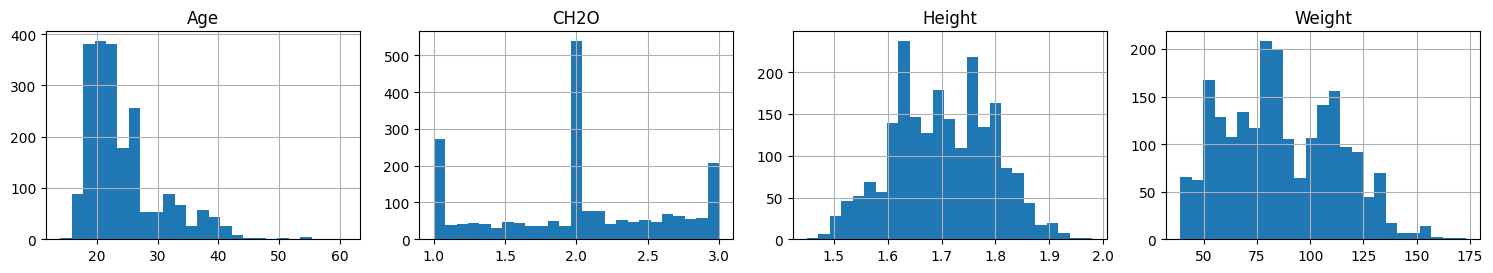

In [23]:
#Histogram for numerical columns
df[num_cols].hist(bins=25,figsize=(15,10),layout=(4,4))
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

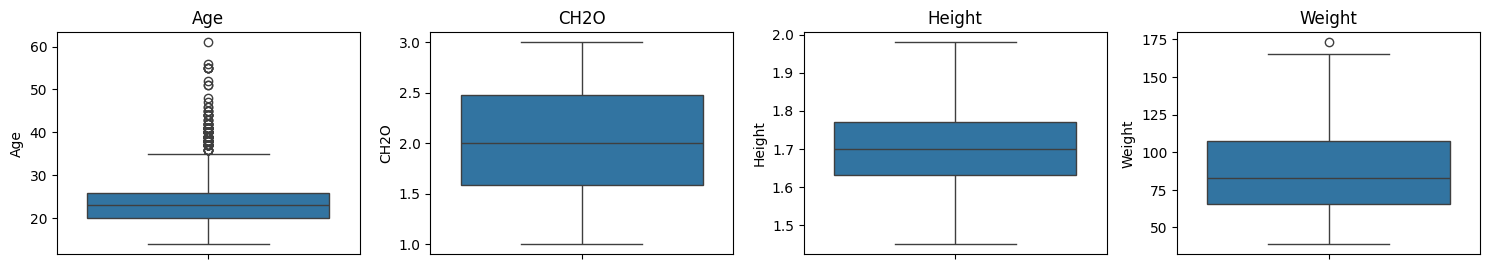

In [24]:
#Box plot to identify outliers
plt.figure(figsize=(15,10))
#enumerate is a buit in fn that allows you to loop over an iterable and have an automatic counter
for i,col in enumerate(num_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show

##### Column "Age" and "Weight" contain outliers

#### SKEWNESS AND KURTOSIS

In [25]:
from scipy.stats import skew, kurtosis

#Calculate skewness and kurtosis
skewness = df[num_cols].apply(skew)
kurtosis = df[num_cols].apply(kurtosis)

print("skewness \n",skewness)
print("kurtosis \n",kurtosis)

#Identify positive skew and negative skew
positive_skew = skewness[skewness > 1]
negative_skew = skewness[skewness < -1]

print("varible with positive skewness \n",positive_skew)
print("varible with negative skewness \n",negative_skew)

#Identify leptokurtic and platykurtic 
leptokurtic = kurtosis[kurtosis > 3]
platykurtic = kurtosis[kurtosis < 3]


print("leptokurtic \n",leptokurtic)
print("platykurtic \n",platykurtic)

skewness 
 Age       1.520245
CH2O     -0.104952
Height   -0.009109
Weight    0.255241
dtype: float64
kurtosis 
 Age       2.789117
CH2O     -0.880014
Height   -0.566589
Weight   -0.701068
dtype: float64
varible with positive skewness 
 Age    1.520245
dtype: float64
varible with negative skewness 
 Series([], dtype: float64)
leptokurtic 
 Series([], dtype: float64)
platykurtic 
 Age       2.789117
CH2O     -0.880014
Height   -0.566589
Weight   -0.701068
dtype: float64


#### CORRELATION

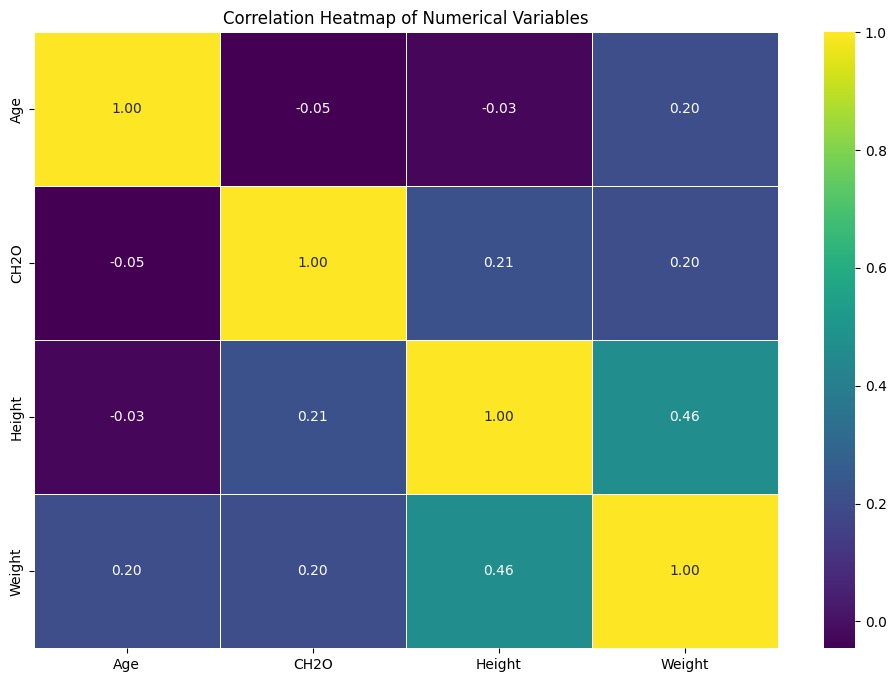

In [26]:
# Calculate the correlation matrix
correlation_matrix = df[num_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

##### None of the numerical features are highly correlated with each other (No Multi colinearity)

#### ANALYSING CATEGORICAL COLUMNS

In [27]:
#Finding unique values in each categorical column and its count
for column in cat_cols:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}, Length: {len(unique_values)}")

Unique values in CAEC: ['Sometimes' 'Frequently' 'Always' 'no'], Length: 4
Unique values in CALC: ['no' 'Sometimes' 'Frequently' 'Always'], Length: 4
Unique values in FAF: [0 3 2 1], Length: 4
Unique values in FAVC: ['no' 'yes'], Length: 2
Unique values in FCVC: [2 3 1], Length: 3
Unique values in Gender: ['Female' 'Male'], Length: 2
Unique values in MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike'], Length: 5
Unique values in NCP: [3 1 4 2], Length: 4
Unique values in NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III'], Length: 7
Unique values in SCC: ['no' 'yes'], Length: 2
Unique values in SMOKE: ['no' 'yes'], Length: 2
Unique values in TUE: [1 0 2], Length: 3
Unique values in family_history_with_overweight: ['yes' 'no'], Length: 2


##### UNIQUE VALUES IN EACH COLUMN
- The CAEC column contains 4 unique values: ['Sometimes' 'Frequently' 'Always' 'no'].
- The CALC column contains 4 unique values: ['no' 'Sometimes' 'Frequently' 'Always'].
- The FAF column contains 4 unique values: [0 3 2 1].
- The FAVC column contains 2 unique values: ['no' 'yes'].
- The FCVC column contains 3 unique values: [2 3 1].
- The Gender column contains 2 unique values: ['Female' 'Male'].
- The MTRANS column contains 5 unique values: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike'].
- The NCP column contains 4 unique values: [3 1 4 2].
- The NObeyesdad column contains 7 unique values: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II' 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II' 'Obesity_Type_III'].
- The SCC column contains 2 unique values: ['no' 'yes'].
- The SMOKE column contains 2 unique values: ['no' 'yes'].
- The TUE column contains 3 unique values: [1 0 2].
- The family_history_with_overweight column contains 2 unique values: ['yes' 'no'].


In [28]:
for column in cat_cols:
    print(f"Value counts for {column}:")
    value_counts = df[column].value_counts()
    print(value_counts)

Value counts for CAEC:
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
Value counts for CALC:
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
Value counts for FAF:
FAF
1    776
0    720
2    496
3    119
Name: count, dtype: int64
Value counts for FAVC:
FAVC
yes    1866
no      245
Name: count, dtype: int64
Value counts for FCVC:
FCVC
2    1013
3     996
1     102
Name: count, dtype: int64
Value counts for Gender:
Gender
Male      1068
Female    1043
Name: count, dtype: int64
Value counts for MTRANS:
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
Value counts for NCP:
NCP
3    1470
1     316
2     176
4     149
Name: count, dtype: int64
Value counts for NObeyesdad:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_

In [29]:
# Cross-tabulation for NObeyesdad with CAEC
pd.crosstab(df["NObeyesdad"], df["CAEC"], margins=True)

CAEC,Always,Frequently,Sometimes,no,All
NObeyesdad,,,,,
Insufficient_Weight,2,121,146,3,272
Normal_Weight,35,83,159,10,287
Obesity_Type_I,6,6,338,1,351
Obesity_Type_II,2,1,293,1,297
Obesity_Type_III,0,1,323,0,324
Overweight_Level_I,5,14,236,35,290
Overweight_Level_II,3,16,270,1,290
All,53,242,1765,51,2111


In [30]:
# Cross-tabulation for NObeyesdad with CALC
pd.crosstab(df["NObeyesdad"], df["CALC"], margins=True)


CALC,Always,Frequently,Sometimes,no,All
NObeyesdad,,,,,
Insufficient_Weight,0,1,154,117,272
Normal_Weight,1,18,161,107,287
Obesity_Type_I,0,14,172,165,351
Obesity_Type_II,0,2,224,71,297
Obesity_Type_III,0,0,323,1,324
Overweight_Level_I,0,16,224,50,290
Overweight_Level_II,0,19,143,128,290
All,1,70,1401,639,2111


In [31]:
# Cross-tabulation for NObeyesdad with FAF
pd.crosstab(df["NObeyesdad"], df["FAF"], margins=True)

FAF,0,1,2,3,All
NObeyesdad,,,,,
Insufficient_Weight,72,72,117,11,272
Normal_Weight,80,97,69,41,287
Obesity_Type_I,131,123,72,25,351
Obesity_Type_II,69,165,63,0,297
Obesity_Type_III,187,68,69,0,324
Overweight_Level_I,84,126,56,24,290
Overweight_Level_II,97,125,50,18,290
All,720,776,496,119,2111


In [32]:
# Cross-tabulation for NObeyesdad with FAVC
pd.crosstab(df["NObeyesdad"], df["FAVC"], margins=True)


FAVC,no,yes,All
NObeyesdad,,,
Insufficient_Weight,51,221,272
Normal_Weight,79,208,287
Obesity_Type_I,11,340,351
Obesity_Type_II,7,290,297
Obesity_Type_III,1,323,324
Overweight_Level_I,22,268,290
Overweight_Level_II,74,216,290
All,245,1866,2111


In [33]:
# Cross-tabulation for NObeyesdad with FCVC
pd.crosstab(df["NObeyesdad"], df["FCVC"], margins=True)


FCVC,1,2,3,All
NObeyesdad,,,,
Insufficient_Weight,23,86,163,272
Normal_Weight,18,155,114,287
Obesity_Type_I,17,256,78,351
Obesity_Type_II,21,138,138,297
Obesity_Type_III,0,0,324,324
Overweight_Level_I,14,186,90,290
Overweight_Level_II,9,192,89,290
All,102,1013,996,2111


In [34]:
# Cross-tabulation for NObeyesdad with Gender
pd.crosstab(df["NObeyesdad"], df["Gender"], margins=True)


Gender,Female,Male,All
NObeyesdad,,,
Insufficient_Weight,173,99,272
Normal_Weight,141,146,287
Obesity_Type_I,156,195,351
Obesity_Type_II,2,295,297
Obesity_Type_III,323,1,324
Overweight_Level_I,145,145,290
Overweight_Level_II,103,187,290
All,1043,1068,2111


In [35]:
# Cross-tabulation for NObeyesdad with MTRANS
pd.crosstab(df["NObeyesdad"], df["MTRANS"], margins=True)


MTRANS,Automobile,Bike,Motorbike,Public_Transportation,Walking,All
NObeyesdad,,,,,,
Insufficient_Weight,46,0,0,220,6,272
Normal_Weight,45,4,6,200,32,287
Obesity_Type_I,110,0,3,236,2,351
Obesity_Type_II,95,1,0,200,1,297
Obesity_Type_III,1,0,0,323,0,324
Overweight_Level_I,66,2,1,212,9,290
Overweight_Level_II,94,0,1,189,6,290
All,457,7,11,1580,56,2111


In [36]:
# Cross-tabulation for NObeyesdad with NCP
pd.crosstab(df["NObeyesdad"], df["NCP"], margins=True)


NCP,1,2,3,4,All
NObeyesdad,,,,,
Insufficient_Weight,37,18,145,72,272
Normal_Weight,52,0,206,29,287
Obesity_Type_I,79,47,225,0,351
Obesity_Type_II,24,36,228,9,297
Obesity_Type_III,0,0,324,0,324
Overweight_Level_I,76,23,158,33,290
Overweight_Level_II,48,52,184,6,290
All,316,176,1470,149,2111


In [37]:
# Cross-tabulation for NObeyesdad with SCC
pd.crosstab(df["NObeyesdad"], df["SCC"], margins=True)


SCC,no,yes,All
NObeyesdad,,,
Insufficient_Weight,250,22,272
Normal_Weight,257,30,287
Obesity_Type_I,349,2,351
Obesity_Type_II,296,1,297
Obesity_Type_III,324,0,324
Overweight_Level_I,253,37,290
Overweight_Level_II,286,4,290
All,2015,96,2111


In [38]:
# Cross-tabulation for NObeyesdad with SMOKE
pd.crosstab(df["NObeyesdad"], df["SMOKE"], margins=True)


SMOKE,no,yes,All
NObeyesdad,,,
Insufficient_Weight,271,1,272
Normal_Weight,274,13,287
Obesity_Type_I,345,6,351
Obesity_Type_II,282,15,297
Obesity_Type_III,323,1,324
Overweight_Level_I,287,3,290
Overweight_Level_II,285,5,290
All,2067,44,2111


In [39]:
# Cross-tabulation for NObeyesdad with TUE
pd.crosstab(df["NObeyesdad"], df["TUE"], margins=True)


TUE,0,1,2,All
NObeyesdad,,,,
Insufficient_Weight,94,127,51,272
Normal_Weight,129,122,36,287
Obesity_Type_I,169,121,61,351
Obesity_Type_II,173,103,21,297
Obesity_Type_III,109,215,0,324
Overweight_Level_I,164,82,44,290
Overweight_Level_II,114,145,31,290
All,952,915,244,2111


In [40]:
# Cross-tabulation for NObeyesdad with family_history_with_overweight
pd.crosstab(df["NObeyesdad"], df["family_history_with_overweight"], margins=True)


family_history_with_overweight,no,yes,All
NObeyesdad,,,
Insufficient_Weight,146,126,272
Normal_Weight,132,155,287
Obesity_Type_I,7,344,351
Obesity_Type_II,1,296,297
Obesity_Type_III,0,324,324
Overweight_Level_I,81,209,290
Overweight_Level_II,18,272,290
All,385,1726,2111


### <font color='BLUE'>DATA PREPROCESSING</font>

In [41]:
#Creating a copy for preprocessing to preserve the original data.
df1=df.copy()
df1.shape

(2111, 17)

#### HANDLING DUPLICATES

In [42]:
#Droping duplicates
df1=df1.drop_duplicates()
df1

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2,3,Sometimes,no,2.00,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3,3,Sometimes,yes,3.00,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2,3,Sometimes,no,2.00,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3,3,Sometimes,no,2.00,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2,1,Sometimes,no,2.00,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3,3,Sometimes,no,1.73,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3,3,Sometimes,no,2.01,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3,3,Sometimes,no,2.05,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3,3,Sometimes,no,2.85,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


#### HANDLING OUTLIER

In [43]:
#Numerical columns
num_cols1 = df1[['Age', 'CH2O', 'Height', 'Weight']]

In [44]:
# Function using IQR method to calculate lower and upper whiskers for outlier detection.
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [45]:
for i in num_cols1:
    lw,uw=whisker(df1[i])
    df1[i]=np.where(df1[i]<lw,lw,df1[i])
    df1[i]=np.where(df1[i]>uw,uw,df1[i]) 

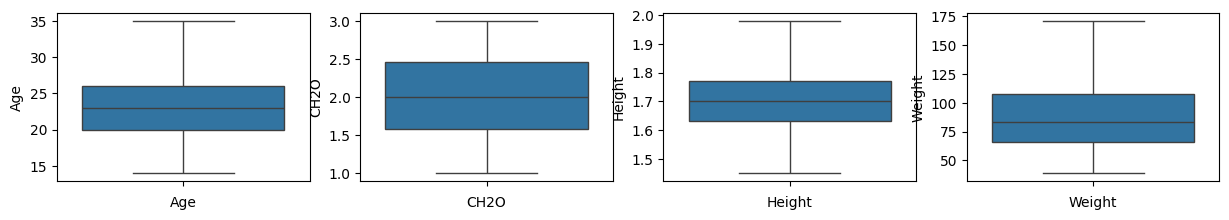

In [46]:
#box plot after outlier treatment
fig = plt.figure(figsize=(15,10))
counter = 0

for col in num_cols1:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df1[col])
    plt.xlabel(col)
    counter = counter + 1

##### All the outliers are removed from the columns "Age" and "Weight"

#### RECHECK THE SKEWNESS AND KURTOSIS

In [47]:
from scipy.stats import skew, kurtosis

#Calculate skewness and kurtosis
skewness = num_cols1.apply(skew)
kurtosis = num_cols1.apply(kurtosis)

print("skewness \n",skewness)
print("kurtosis \n",kurtosis)

#Identify positive skew and negative skew
positive_skew = skewness[skewness > 1]
negative_skew = skewness[skewness < -1]

print("varible with positive skewness \n",positive_skew)
print("varible with negative skewness \n",negative_skew)

#Identify leptokurtic and platykurtic 
leptokurtic = kurtosis[kurtosis > 3]
platykurtic = kurtosis[kurtosis < 3]


print("leptokurtic \n",leptokurtic)
print("platykurtic \n",platykurtic)

skewness 
 Age       1.501789
CH2O     -0.103993
Height   -0.023522
Weight    0.242865
dtype: float64
kurtosis 
 Age       2.708243
CH2O     -0.866868
Height   -0.556882
Weight   -0.706585
dtype: float64
varible with positive skewness 
 Age    1.501789
dtype: float64
varible with negative skewness 
 Series([], dtype: float64)
leptokurtic 
 Series([], dtype: float64)
platykurtic 
 Age       2.708243
CH2O     -0.866868
Height   -0.556882
Weight   -0.706585
dtype: float64


In [48]:
#Shape after preprocessing
df1.shape

(2076, 17)

In [49]:
#Converting preprocessed dataframe into csv file to create dashboard
df1.to_csv('obersity.csv', index=False)

### <font color='BLUE'> VISUALIZATION </font>

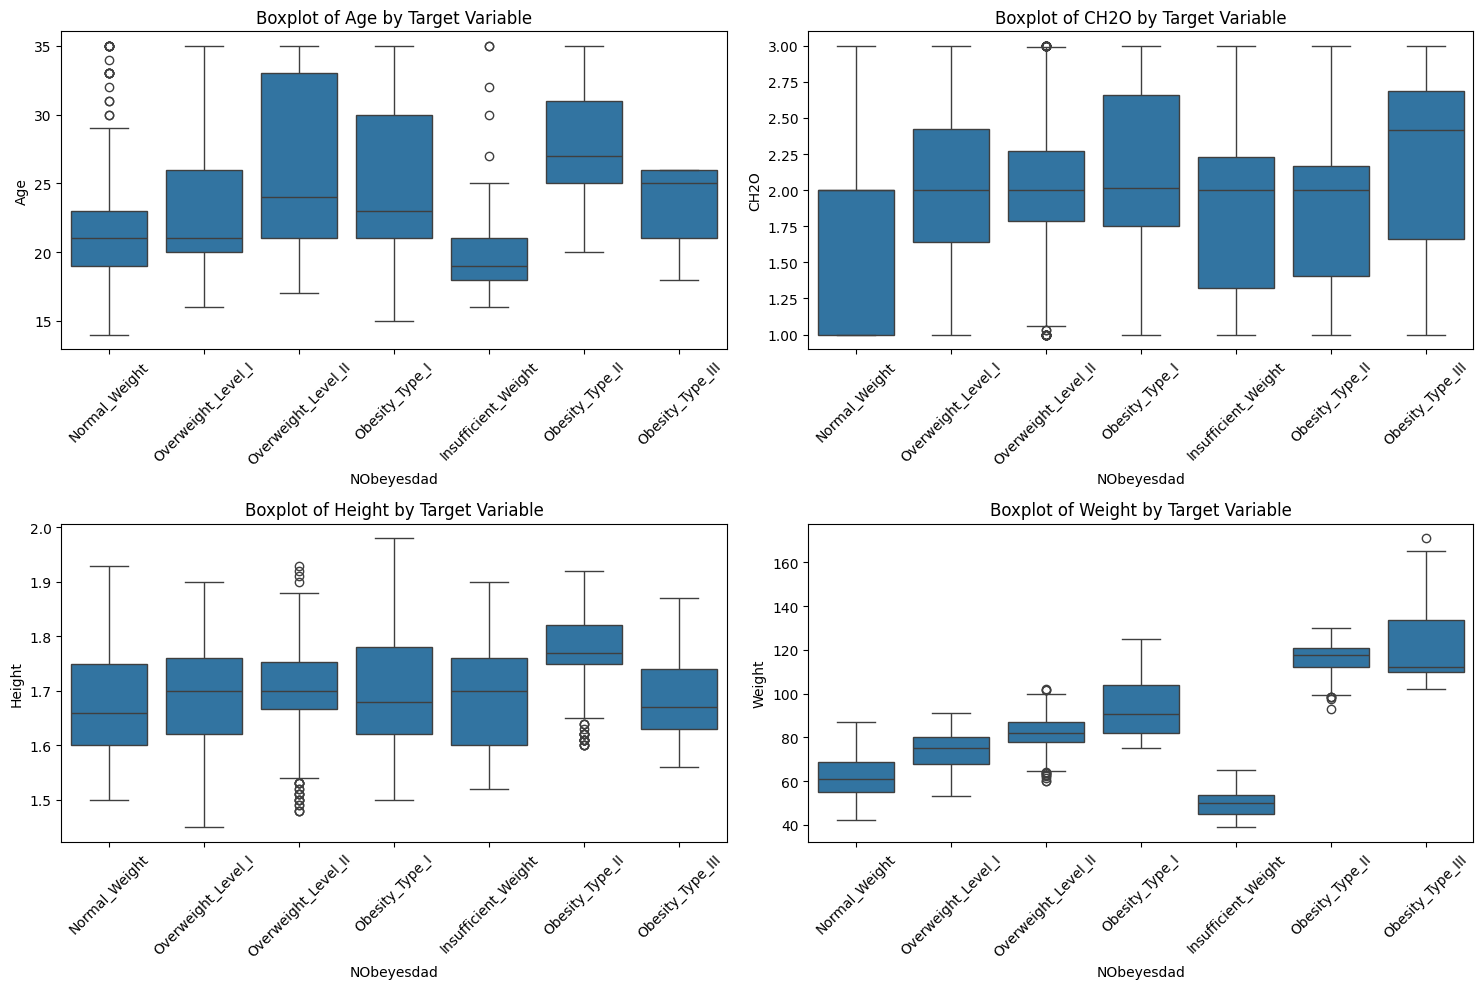

In [50]:
# List of numerical columns
numerical_columns = ['Age', 'CH2O', 'Height', 'Weight']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot boxplots for each numerical column grouped by the target variable
for i, col in enumerate(numerical_columns):
    sns.boxplot(x='NObeyesdad', y=col, data=df1, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Target Variable')
    axes[i].set_xlabel('NObeyesdad')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


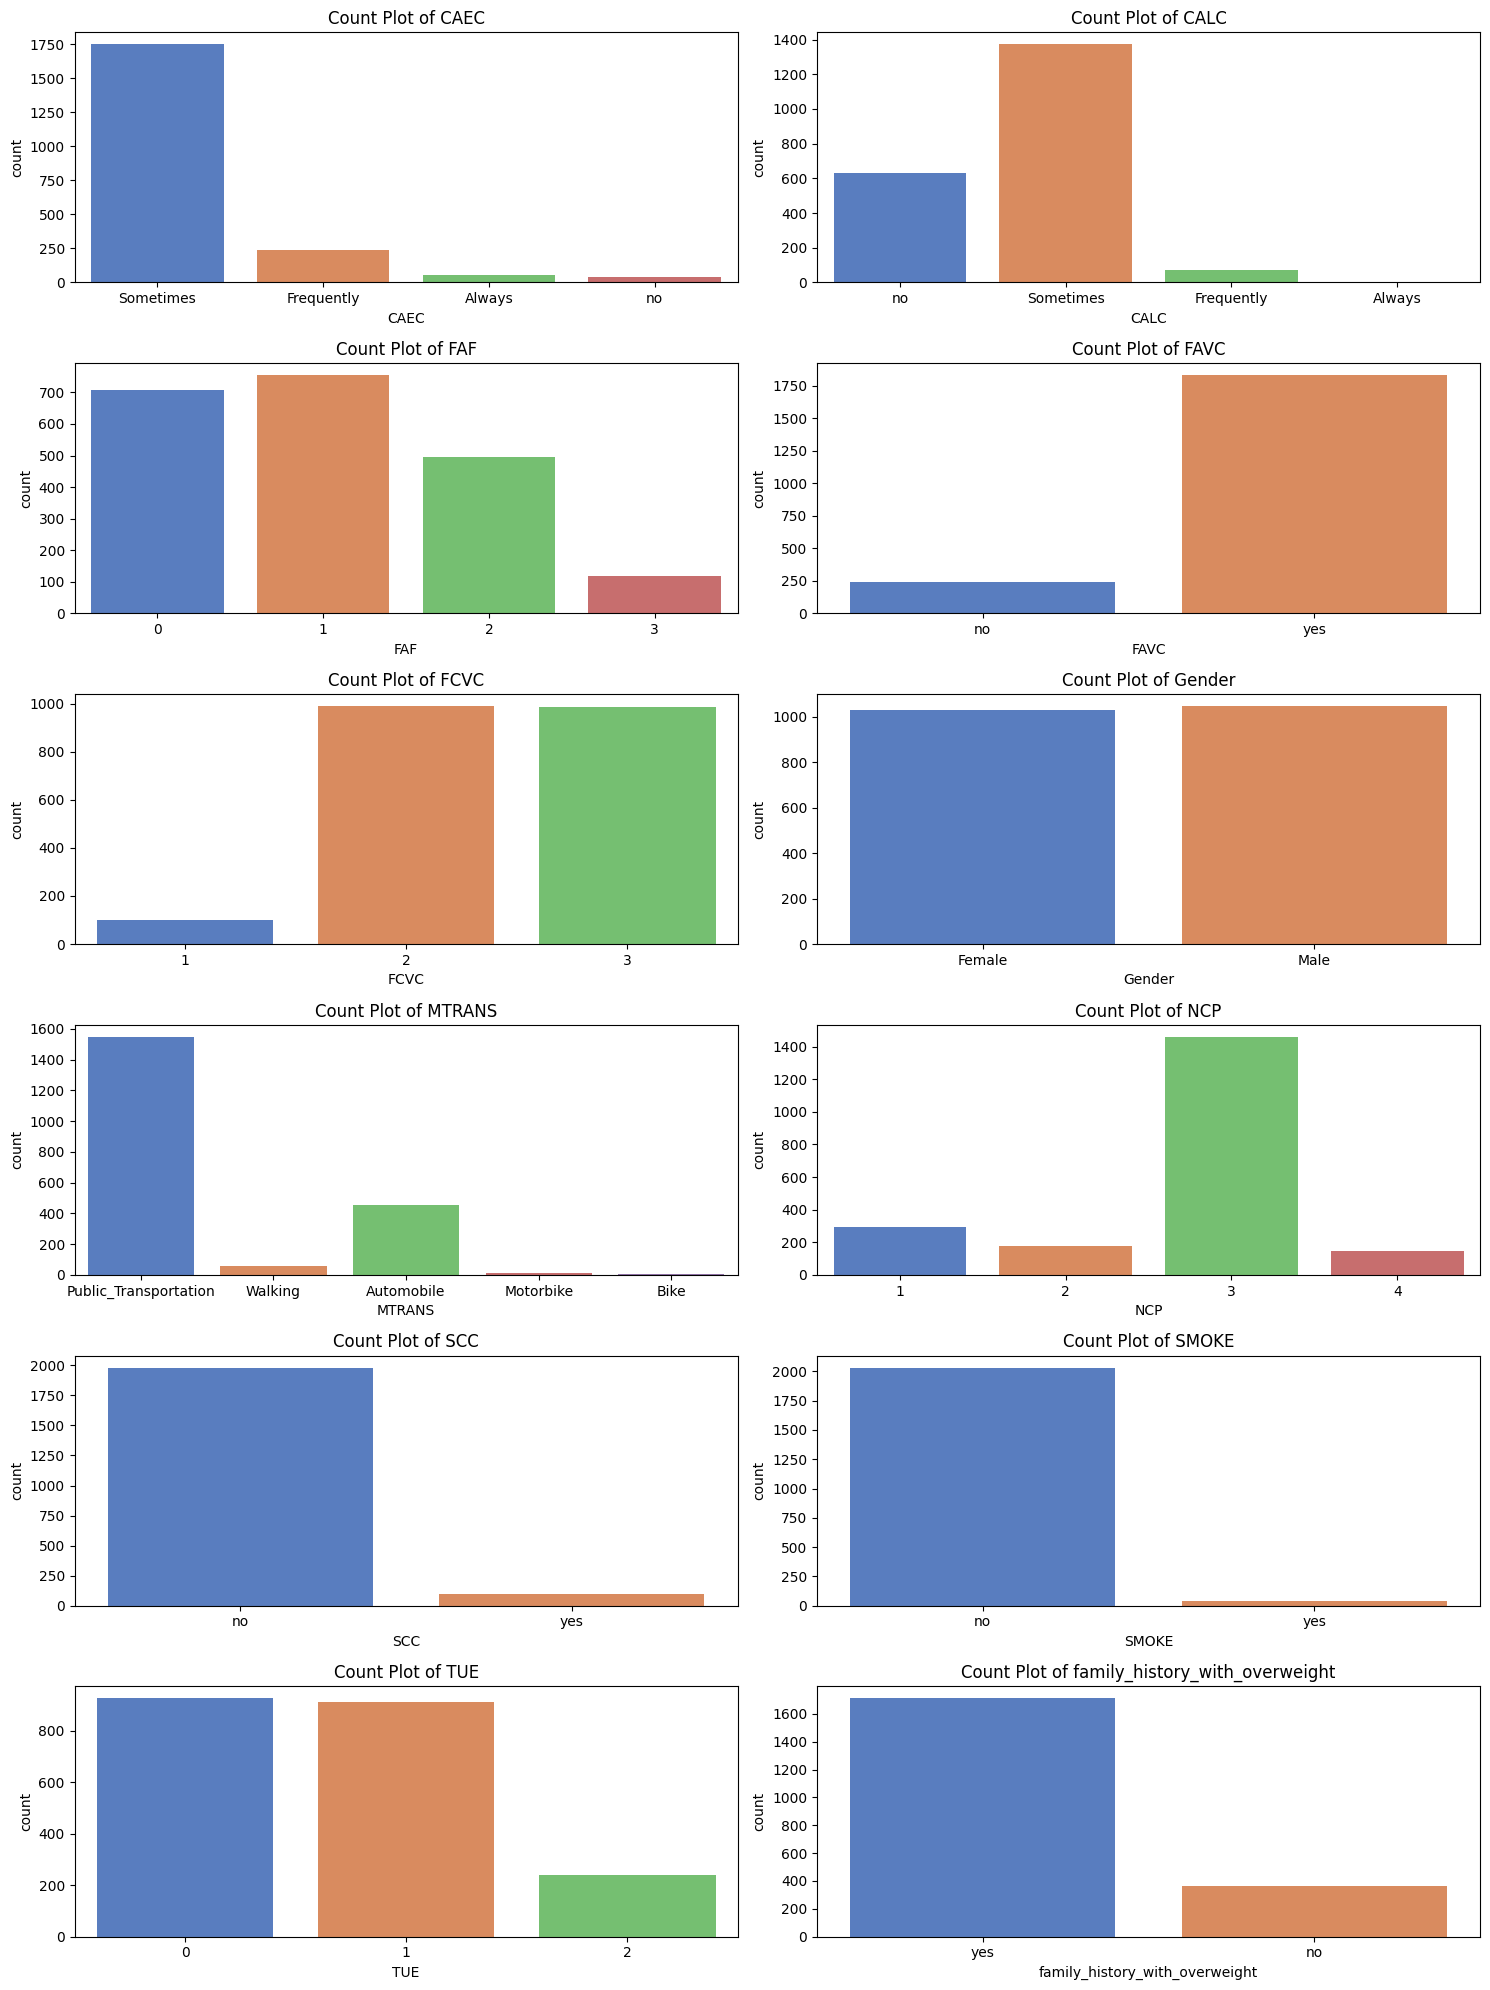

In [51]:
# Categorical columns to plot
categorical_columns = ['CAEC', 'CALC', 'FAF', 'FAVC', 'FCVC', 'Gender', 'MTRANS', 'NCP', 'SCC', 'SMOKE', 'TUE', 'family_history_with_overweight']

# Create subplots
fig, axes = plt.subplots(6, 2, figsize=(15, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot count plots for each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df1, ax=axes[i], palette="muted")
    axes[i].set_title(f'Count Plot of {column}')

# Hide the empty subplots if any
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

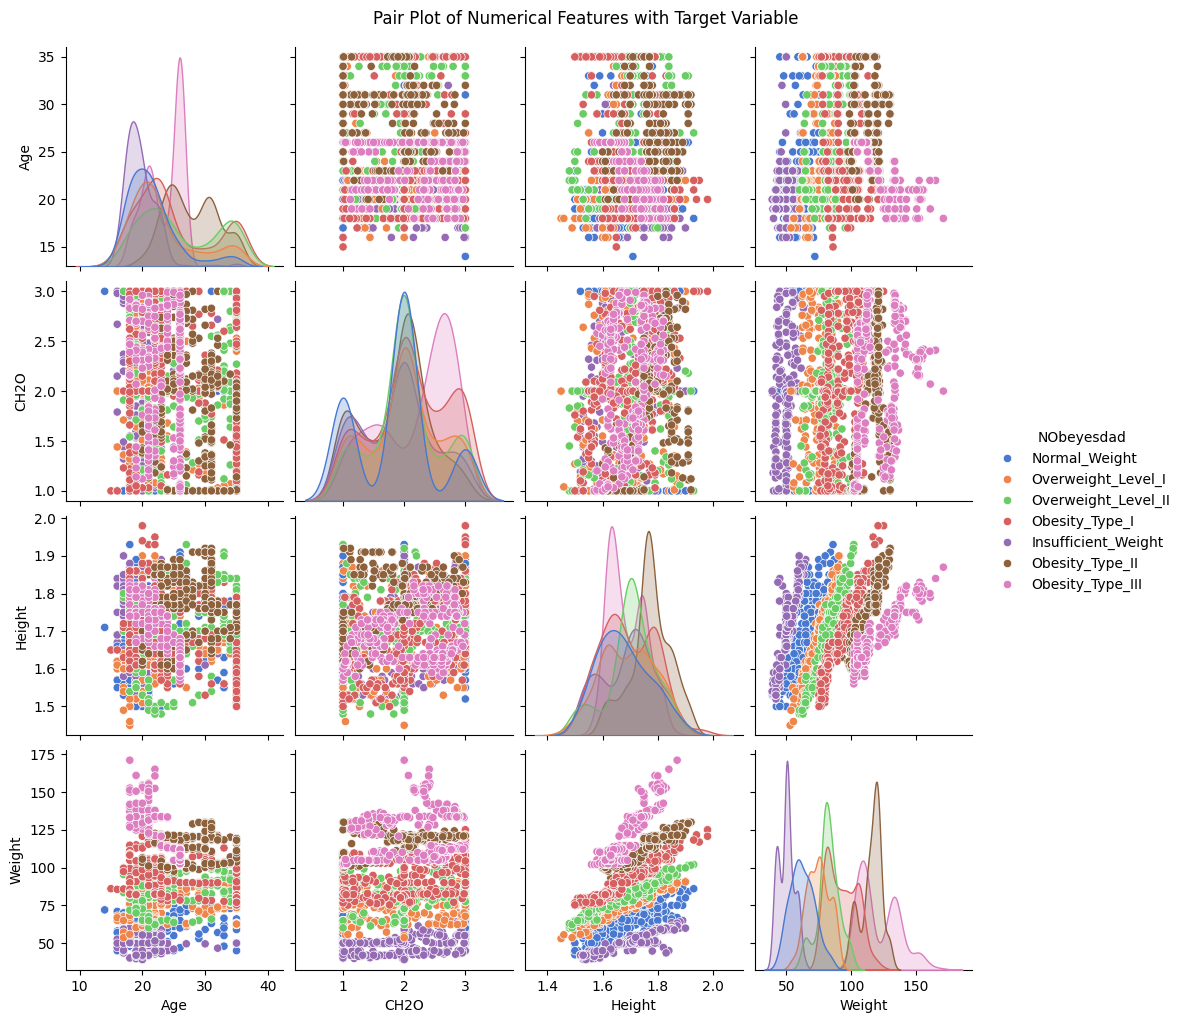

In [52]:
# Pair plot for numerical columns with hue set to the target variable
sns.pairplot(df1[['Age', 'CH2O', 'Height', 'Weight', 'NObeyesdad']], hue='NObeyesdad', palette="muted")
plt.suptitle('Pair Plot of Numerical Features with Target Variable', y=1.02)
plt.show()

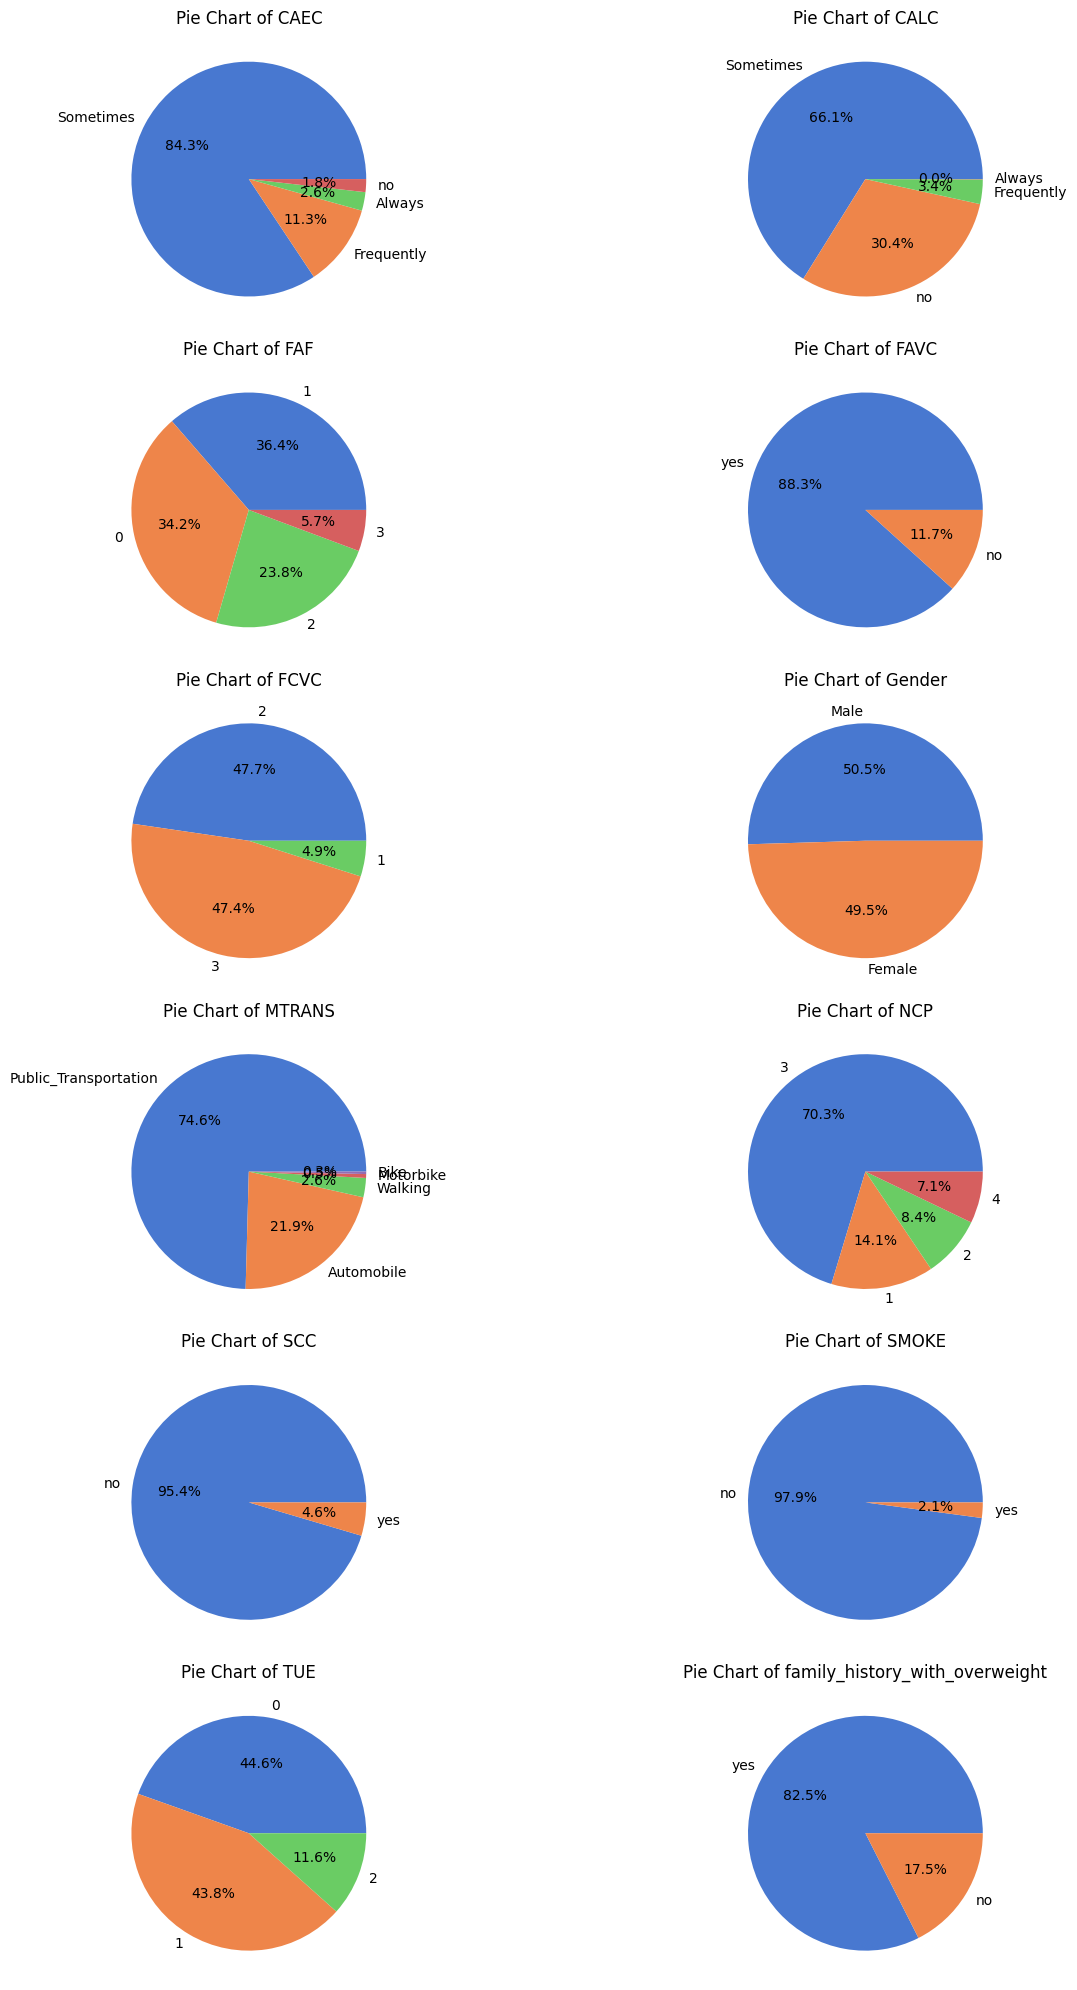

In [53]:
# Create subplots
fig, axes = plt.subplots(6, 2, figsize=(15, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot pie charts for each categorical column
for i, col in enumerate(categorical_columns):
    df1[col].value_counts().plot.pie(ax=axes[i], autopct='%1.1f%%', colors=sns.color_palette("muted"))
    axes[i].set_title(f'Pie Chart of {col}')
    axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


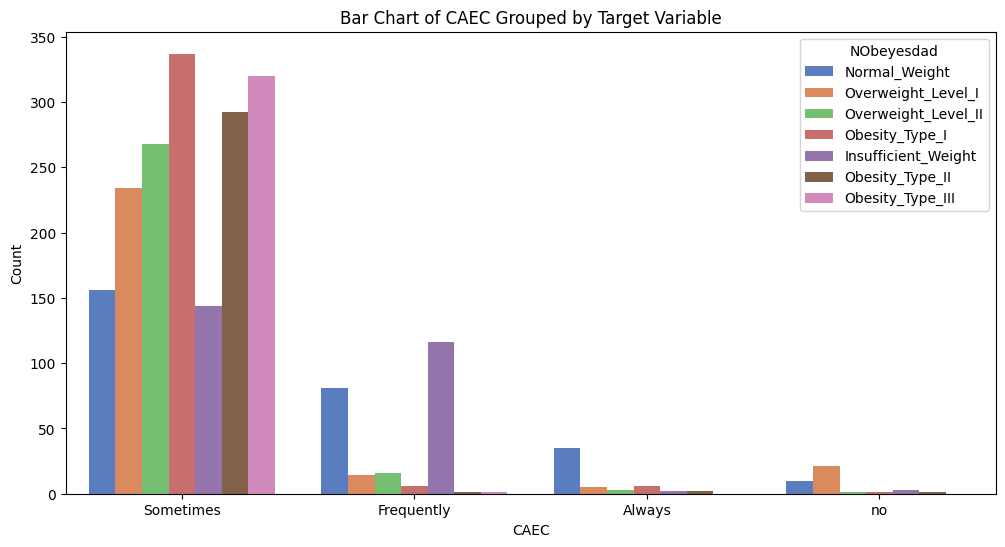

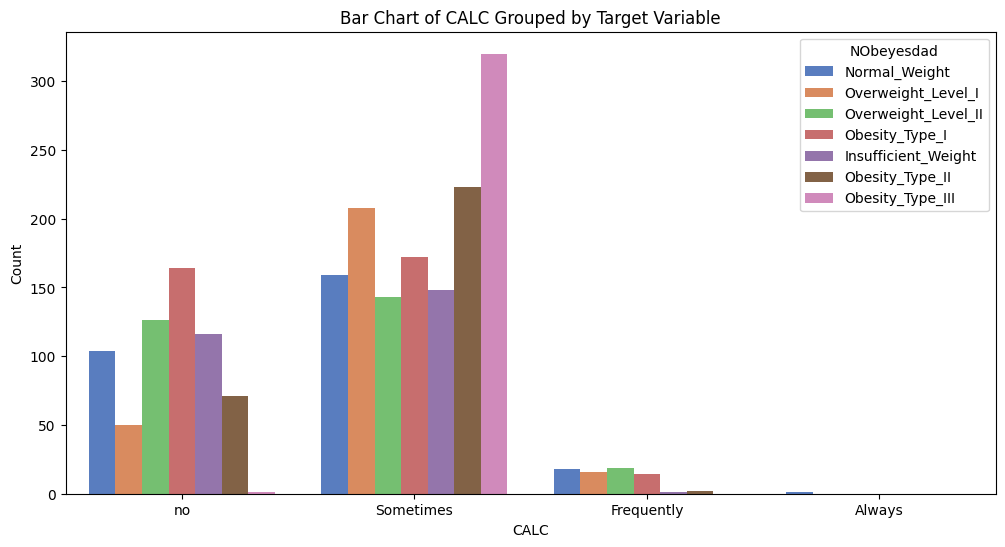

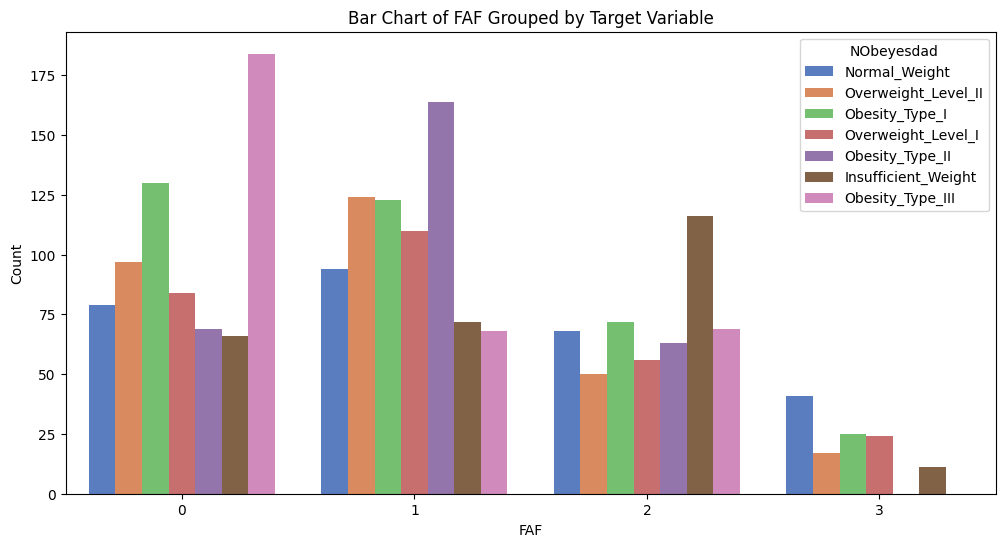

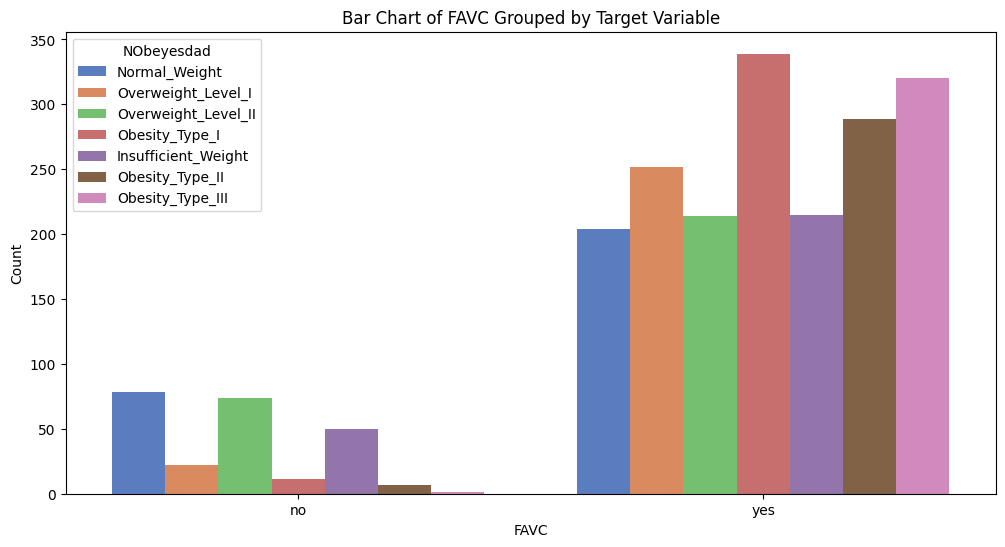

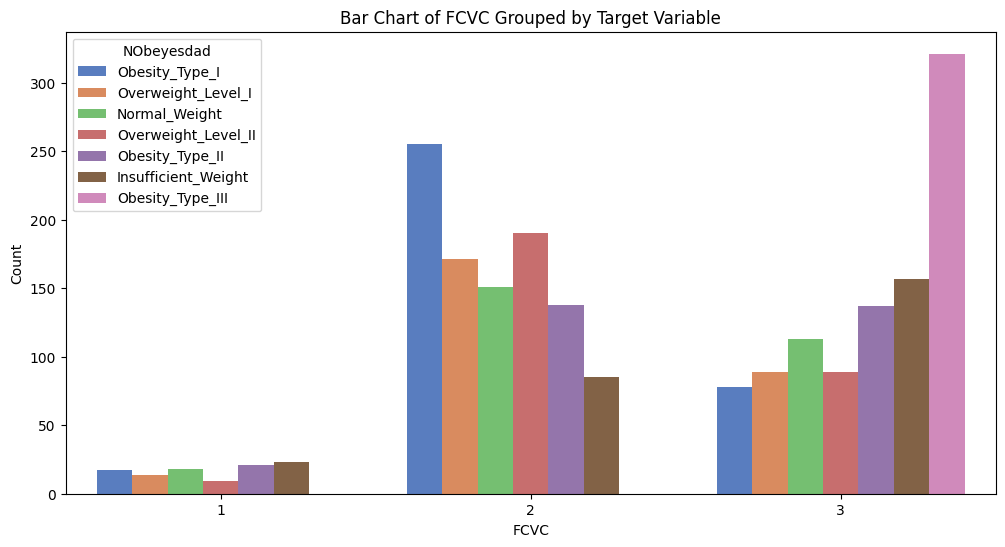

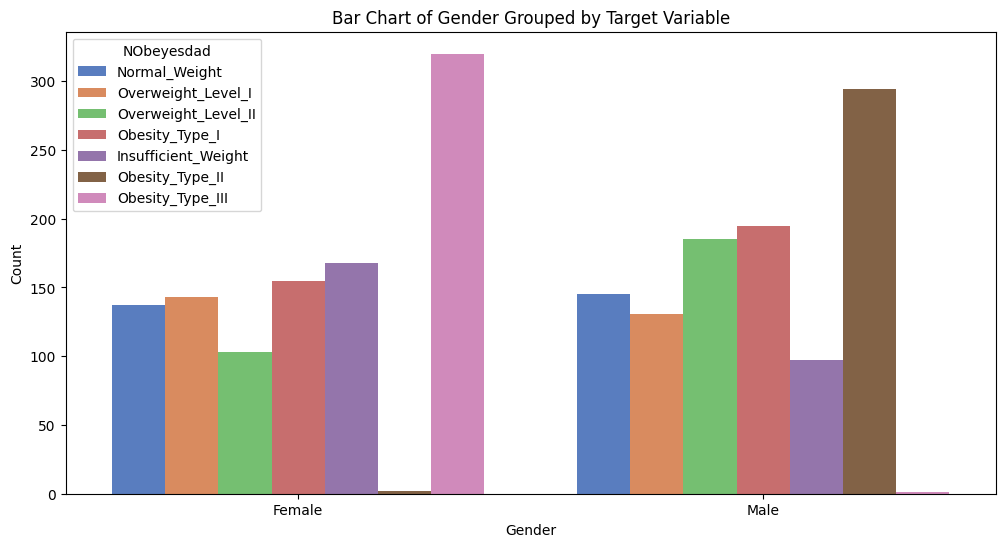

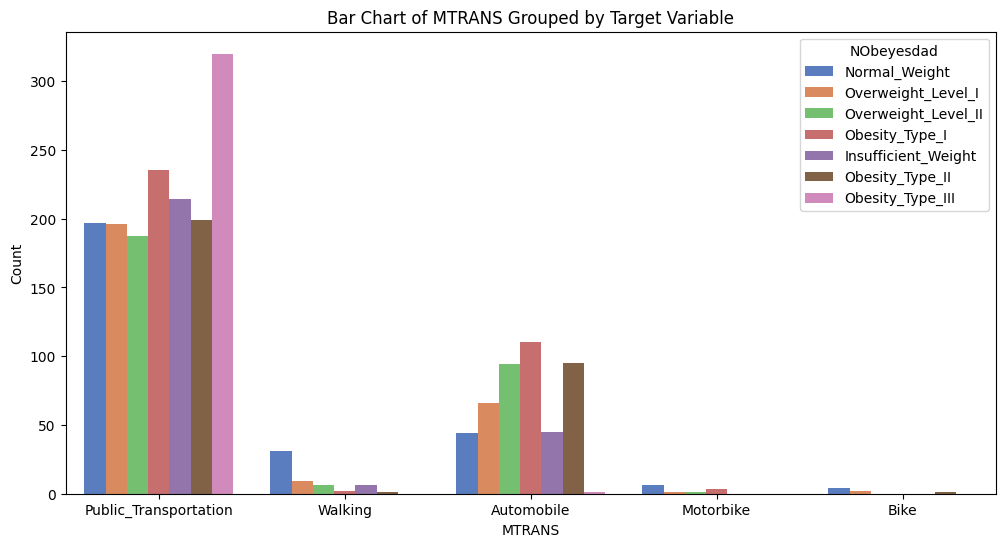

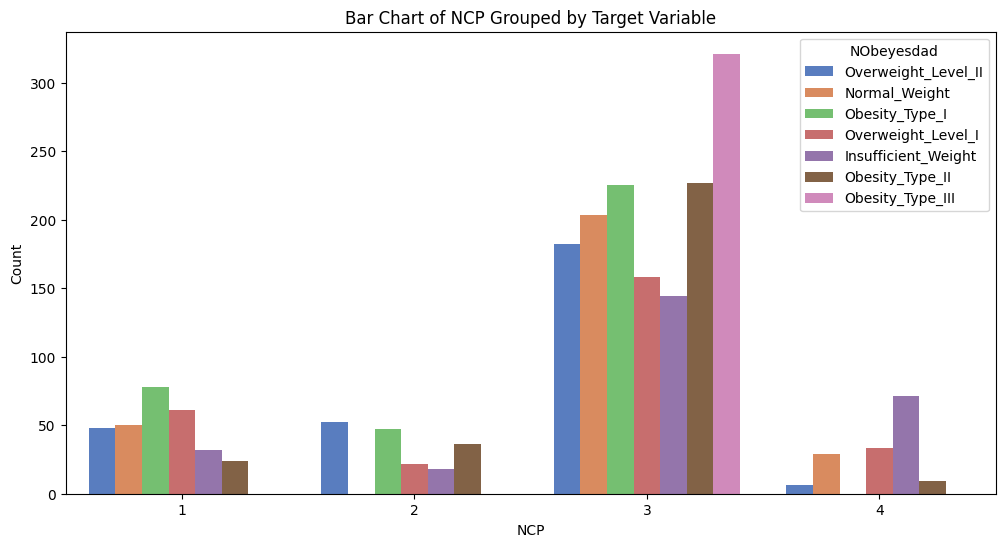

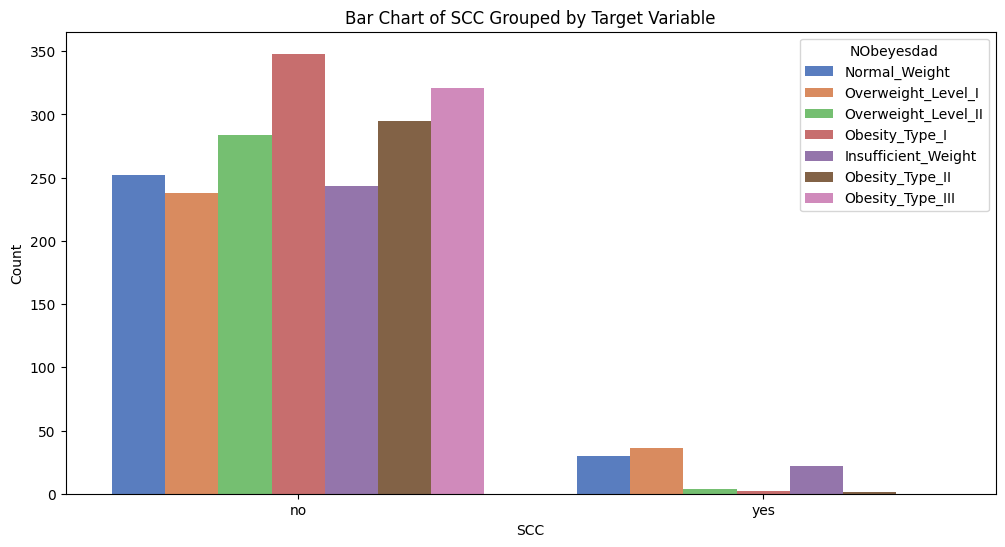

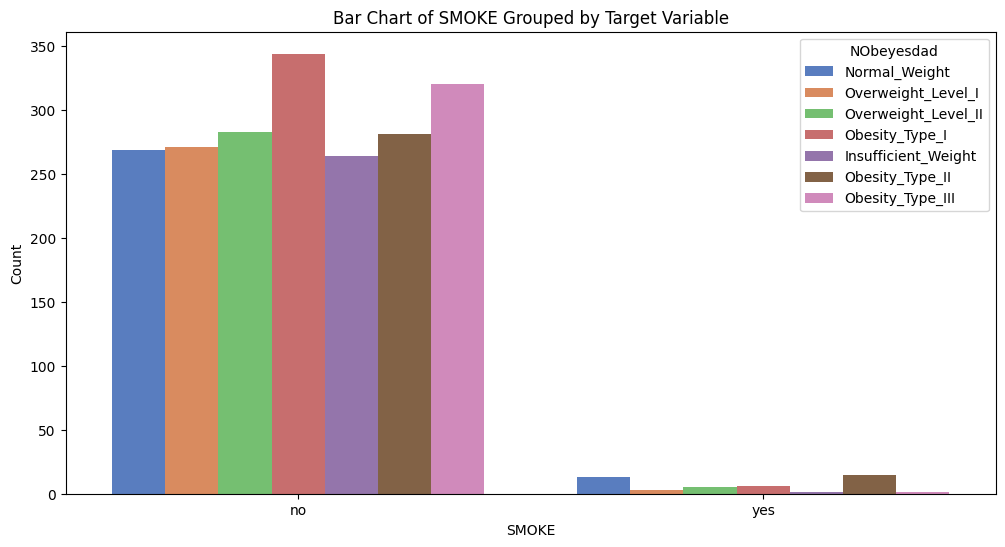

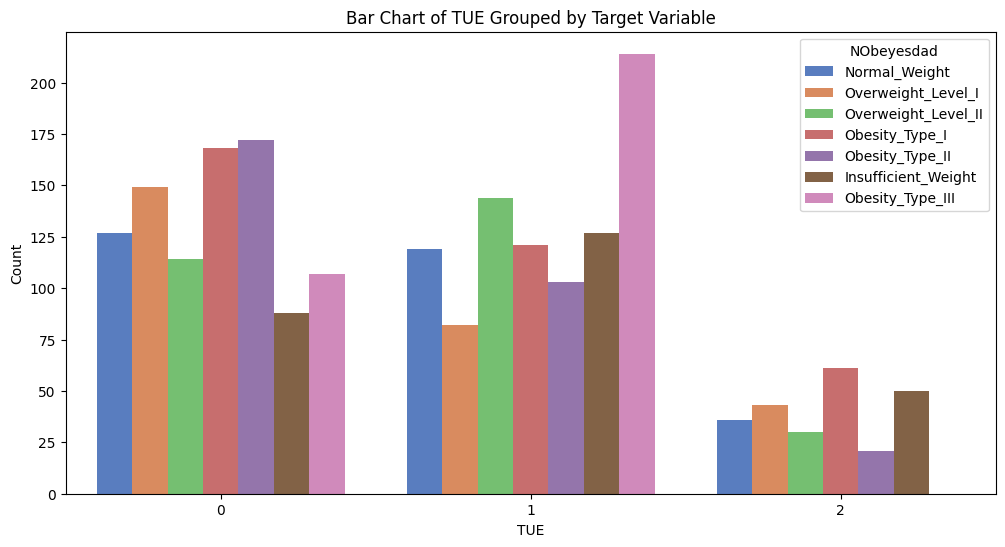

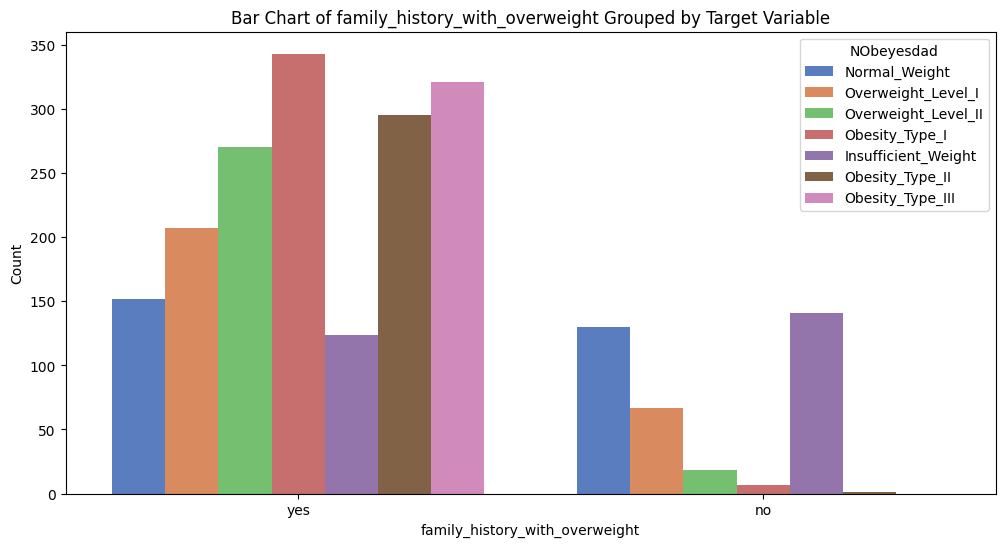

In [54]:
# Bar chart for categorical columns grouped by the target variable
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='NObeyesdad', data=df1, palette="muted")
    plt.title(f'Bar Chart of {col} Grouped by Target Variable')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

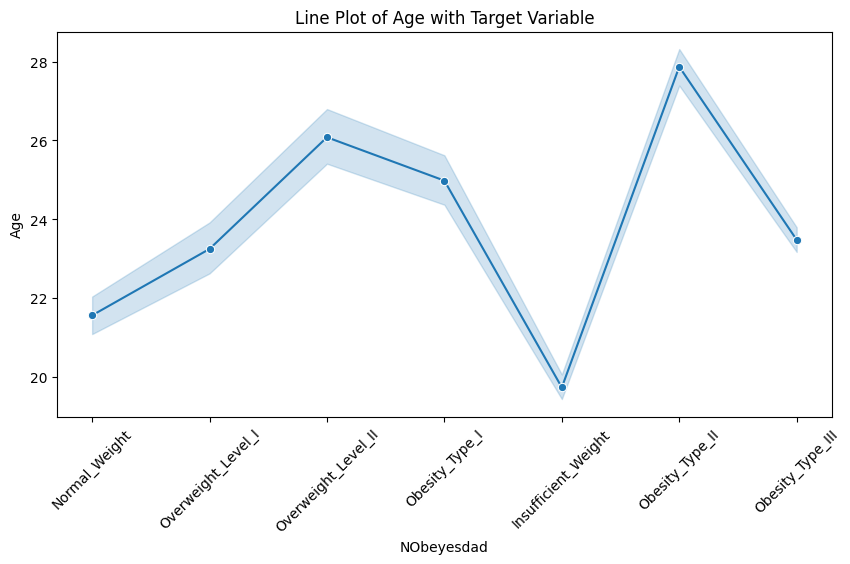

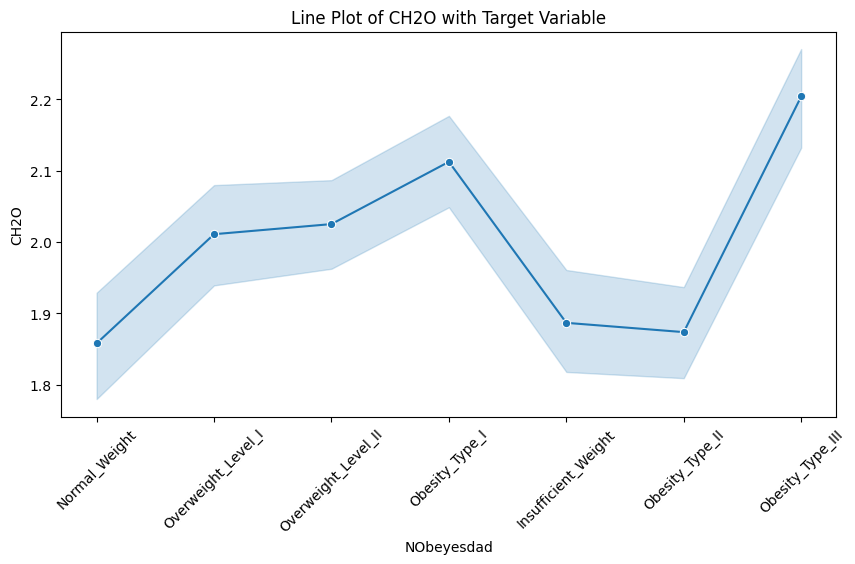

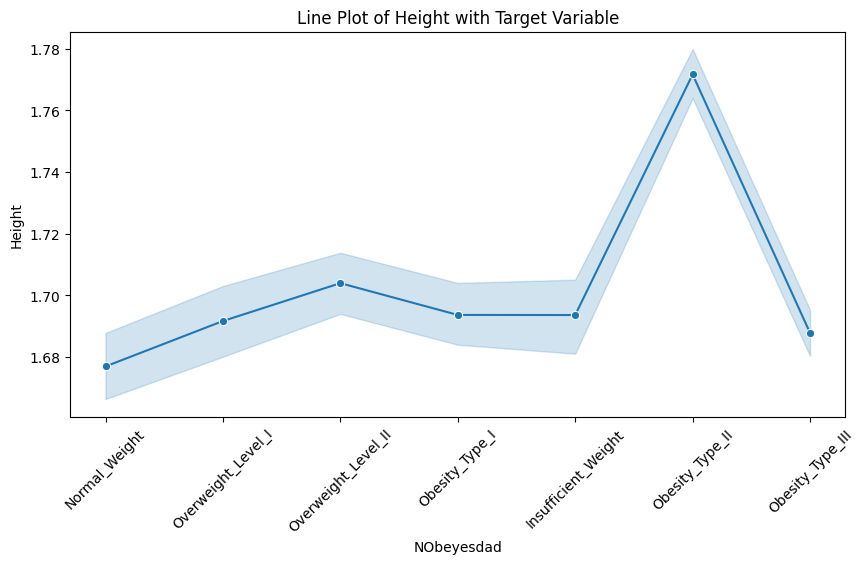

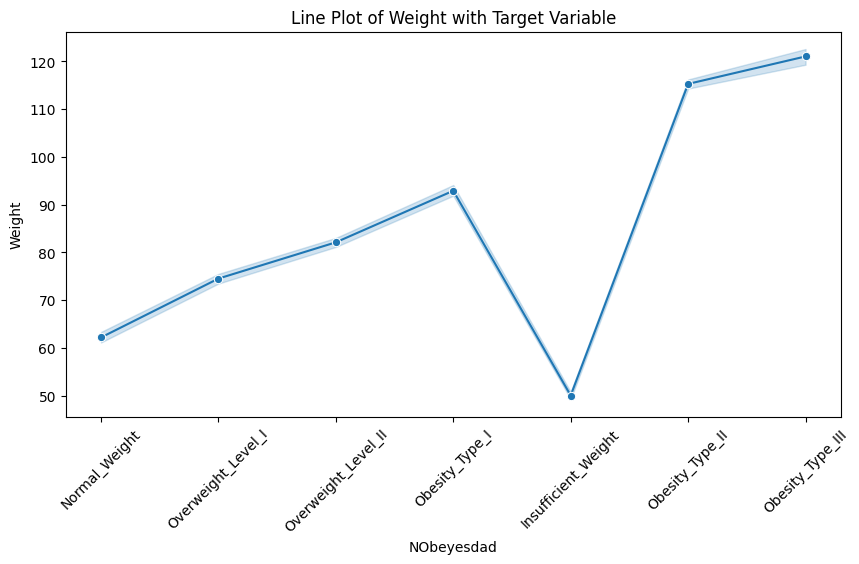

In [55]:
# Line plot for numerical columns with respect to the target variable
for col in ['Age', 'CH2O', 'Height', 'Weight']:
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df1, x='NObeyesdad', y=col, marker='o', palette="muted")
    plt.title(f'Line Plot of {col} with Target Variable')
    plt.xlabel('NObeyesdad')
    plt.ylabel(col)
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
    plt.show()


### <font color='BLUE'> FEATURE ENGINEERING </font>

#### <font color='BROWN'>FEATURE EXTRACTION</font>

In [56]:
# Calculate BMI
df1['BMI'] = df1['Weight'] / (df1['Height'] ** 2)

# Create BMI category
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal Weight'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df1['BMI_Category'] = df1['BMI'].apply(categorize_bmi)

# Drop the BMI column to keep only BMI_Category
df1.drop(columns=['BMI'], inplace=True)

df1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI_Category
0,Female,21.0,1.62,64.0,yes,no,2,3,Sometimes,no,2.0,no,0,1,no,Public_Transportation,Normal_Weight,Normal Weight
1,Female,21.0,1.52,56.0,yes,no,3,3,Sometimes,yes,3.0,yes,3,0,Sometimes,Public_Transportation,Normal_Weight,Normal Weight
2,Male,23.0,1.80,77.0,yes,no,2,3,Sometimes,no,2.0,no,2,1,Frequently,Public_Transportation,Normal_Weight,Normal Weight
3,Male,27.0,1.80,87.0,no,no,3,3,Sometimes,no,2.0,no,2,0,Frequently,Walking,Overweight_Level_I,Overweight
4,Male,22.0,1.78,89.8,no,no,2,1,Sometimes,no,2.0,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II,Overweight


##### Added a new column to enhance the predictive model. The BMI_Category feature classifies individuals into categories based on their BMI, providing a more granular analysis of weight status and its impact on obesity risk. This categorization helps in understanding the distribution of individuals across different weight statuses and their association with other features. By incorporating this feature, we aim to improve the predictive capabilities of the model by highlighting important aspects of body composition. 

In [57]:
#Columns in dataframe after feature extraction
df1.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI_Category'],
      dtype='object')

In [58]:
#Rechecking the shape dataframe
df1.shape

(2076, 18)

#### <font color='BROWN'>FEATURE TRANSFORMATION</font>

#### FEATURE ENCODING

In [59]:
#ONE HOT ENCODING
#Importing
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming df1 is your preprocessed DataFrame with numerical and categorical columns
# Define columns to encode
cols_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'BMI_Category']

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform OneHotEncoder on selected columns in df1
encoded_cols = one_hot_encoder.fit_transform(df1[cols_to_encode])

# Create a DataFrame with encoded columns
df_encoded = pd.DataFrame(encoded_cols.toarray(), columns=one_hot_encoder.get_feature_names_out(cols_to_encode))

# Drop original categorical columns from df1 and concatenate encoded columns
df1_encoded = pd.concat([df1.drop(columns=cols_to_encode).reset_index(drop=True), df_encoded], axis=1)

# Display the encoded DataFrame
print(df1_encoded)


       Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE           NObeyesdad  \
0     21.0    1.62   64.00     2    3  2.00    0    1        Normal_Weight   
1     21.0    1.52   56.00     3    3  3.00    3    0        Normal_Weight   
2     23.0    1.80   77.00     2    3  2.00    2    1        Normal_Weight   
3     27.0    1.80   87.00     3    3  2.00    2    0   Overweight_Level_I   
4     22.0    1.78   89.80     2    1  2.00    0    0  Overweight_Level_II   
...    ...     ...     ...   ...  ...   ...  ...  ...                  ...   
2071  21.0    1.71  131.41     3    3  1.73    2    1     Obesity_Type_III   
2072  22.0    1.75  133.74     3    3  2.01    1    1     Obesity_Type_III   
2073  23.0    1.75  133.69     3    3  2.05    1    1     Obesity_Type_III   
2074  24.0    1.74  133.35     3    3  2.85    1    1     Obesity_Type_III   
2075  24.0    1.74  133.47     3    3  2.86    1    1     Obesity_Type_III   

      Gender_Female  ...  CALC_no  MTRANS_Automobile  MTRANS_Bi

In [60]:
df1_encoded.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'NObeyesdad', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking', 'BMI_Category_Normal Weight', 'BMI_Category_Obese',
       'BMI_Category_Overweight', 'BMI_Category_Underweight'],
      dtype='object')

#### FEATURE SCALING

In [61]:
#STANDARD SCALER
#Importing
from sklearn.preprocessing import StandardScaler

# Define numerical columns to scale
num_cols3 = ['Age','Height', 'CH2O', 'Weight']

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the numerical columns
df_scaled = scaler.fit_transform(df1_encoded[num_cols3])

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(df_scaled, columns=num_cols3)

# Replace the original numerical columns with the scaled columns
df1_encoded[num_cols3] = scaled_df

# Print the final DataFrame
print("DataFrame after Scaling Numerical Columns:")
print(df1_encoded)

DataFrame after Scaling Numerical Columns:
           Age    Height    Weight  FCVC  NCP      CH2O  FAF  TUE  \
0    -0.556805 -0.888025 -0.872947     2    3 -0.006326    0    1   
1    -0.556805 -1.960911 -1.178355     3    3  1.637264    3    0   
2    -0.179359  1.043170 -0.376658     2    3 -0.006326    2    1   
3     0.575532  1.043170  0.005103     3    3 -0.006326    2    0   
4    -0.368082  0.828592  0.111996     2    1 -0.006326    0    0   
...        ...       ...       ...   ...  ...       ...  ...  ...   
2071 -0.556805  0.077572  1.700502     3    3 -0.450095    2    1   
2072 -0.368082  0.506727  1.789452     3    3  0.010110    1    1   
2073 -0.179359  0.506727  1.787543     3    3  0.075854    1    1   
2074  0.009363  0.399438  1.774564     3    3  1.390726    1    1   
2075  0.009363  0.399438  1.779145     3    3  1.407162    1    1   

               NObeyesdad  Gender_Female  ...  CALC_no  MTRANS_Automobile  \
0           Normal_Weight            1.0  ...      

In [62]:
df1_encoded.shape

(2076, 36)

### <font color='BLUE'> DATA SPLITTING </font>

In [63]:
# Split dataset into features (x) and target variable(y)
x = df1_encoded.drop('NObeyesdad', axis=1)
x

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,BMI_Category_Normal Weight,BMI_Category_Obese,BMI_Category_Overweight,BMI_Category_Underweight
0,-0.556805,-0.888025,-0.872947,2,3,-0.006326,0,1,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.556805,-1.960911,-1.178355,3,3,1.637264,3,0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-0.179359,1.043170,-0.376658,2,3,-0.006326,2,1,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.575532,1.043170,0.005103,3,3,-0.006326,2,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.368082,0.828592,0.111996,2,1,-0.006326,0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,-0.556805,0.077572,1.700502,3,3,-0.450095,2,1,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2072,-0.368082,0.506727,1.789452,3,3,0.010110,1,1,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2073,-0.179359,0.506727,1.787543,3,3,0.075854,1,1,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2074,0.009363,0.399438,1.774564,3,3,1.390726,1,1,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [64]:
y=df1_encoded['NObeyesdad']
y

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2071       Obesity_Type_III
2072       Obesity_Type_III
2073       Obesity_Type_III
2074       Obesity_Type_III
2075       Obesity_Type_III
Name: NObeyesdad, Length: 2076, dtype: object

In [65]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##### Use this training and testing sets in various classification algorithms

### <font color='BLUE'> MODEL SELECTION </font>

##### Model training is performed using all the features without applying any feature selection techniques.

**Algorithms for Model Training and Evaluation:**
1. Logistic Regression
2. Decision Tree
3. Naive Bayes
4. Random Forest
5. K-Nearest Neighbors

These algorithms will be used for model training and evaluation in our analysis.

### <font color='BLUE'> MODEL TRAINING  </font>

### <font color='GREEN'>1.LOGISTIC REGRESSION </font>

In [66]:
#Importing
from sklearn.linear_model import LogisticRegression

#create object
Logistic_Model = LogisticRegression()

#Train the model with the provided training data
Logistic_Model.fit(x_train, y_train)

LogisticRegression()

In [67]:
# Calculate test accuracy score
Logistic_Model.score(x_test, y_test)

0.9543269230769231

In [68]:
# Predict using the logistic regression model
y_PredictedLogistic = Logistic_Model.predict(x_test)
y_PredictedLogistic

array(['Normal_Weight', 'Obesity_Type_I', 'Overweight_Level_II',
       'Overweight_Level_II', 'Overweight_Level_II', 'Normal_Weight',
       'Obesity_Type_I', 'Normal_Weight', 'Obesity_Type_II',
       'Obesity_Type_III', 'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight', 'Obesity_Type_I',
       'Obesity_Type_I', 'Obesity_Type_II', 'Overweight_Level_II',
       'Normal_Weight', 'Obesity_Type_I', 'Overweight_Level_II',
       'Obesity_Type_II', 'Obesity_Type_III', 'Obesity_Type_II',
       'Obesity_Type_II', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_I', 'Obesity_Type_II',
       'Overweight_Level_I', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_I', 'Overweight_Level_I', 'Normal_Weight',
       'Obesity_Type_I', 'Obesity_Type_II', 'Normal_Weight',
       'Overweight_Level_I', 'Normal_Weight', 'Normal_Weight',
       'Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_III',
       'Obesity_T

In [69]:
# Import confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for logistic regression predictions
cm_logistic = confusion_matrix(y_test, y_PredictedLogistic)
cm_logistic

array([[56,  2,  0,  0,  0,  0,  0],
       [ 1, 59,  0,  0,  0,  0,  0],
       [ 0,  0, 65,  2,  0,  0,  3],
       [ 0,  0,  0, 69,  0,  0,  0],
       [ 0,  0,  0,  0, 57,  0,  0],
       [ 0,  1,  0,  0,  0, 44,  6],
       [ 0,  0,  2,  0,  0,  2, 47]], dtype=int64)

In [70]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_logistic[0, 0]
FP = cm_logistic[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 0.9655172413793104


Text(95.72222222222221, 0.5, 'Truth')

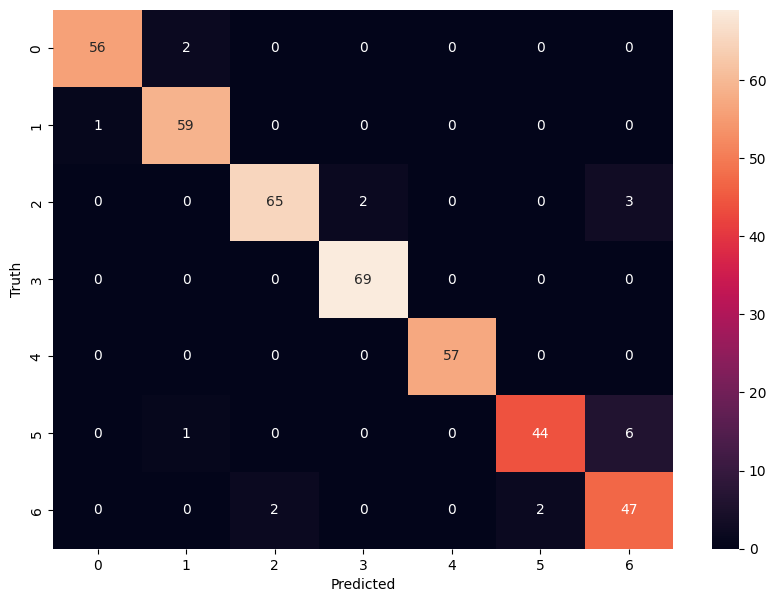

In [71]:
plt.figure(figsize = (10,7))
sns.heatmap(cm_logistic, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

- **Class 0** was mostly correctly classified, with 2 instances misclassified as Class 1.
- **Class 1** had only 1 misclassification, where it was predicted as Class 0.
- **Class 2** was mostly correctly classified, with a few instances misclassified as Class 3 and Class 6.
- **Class 3** had perfect classification.
- **Class 4** had perfect classification.
- **Class 5** had several misclassifications, mostly as Class 6.
- **Class 6** had a few misclassifications, mostly as Class 2 and Class 5.


In [72]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Calculate and print the accuracy score for logistic regression predictions
accuracy = accuracy_score(y_test, y_PredictedLogistic)
print("Accuracy:", accuracy)

Accuracy: 0.9543269230769231


In [73]:
# Import classification_report from sklearn.metrics
from sklearn.metrics import classification_report

# Print the classification report for logistic regression predictions
print(classification_report(y_test, y_PredictedLogistic))


                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.97      0.97        58
      Normal_Weight       0.95      0.98      0.97        60
     Obesity_Type_I       0.97      0.93      0.95        70
    Obesity_Type_II       0.97      1.00      0.99        69
   Obesity_Type_III       1.00      1.00      1.00        57
 Overweight_Level_I       0.96      0.86      0.91        51
Overweight_Level_II       0.84      0.92      0.88        51

           accuracy                           0.95       416
          macro avg       0.95      0.95      0.95       416
       weighted avg       0.96      0.95      0.95       416



In [74]:
# Import necessary libraries
from sklearn.metrics import roc_auc_score

# Predict probabilities on test data using the logistic model
probs_logistic = Logistic_Model.predict_proba(x_test)

# Calculate AUC for logistic classifier
auc_logistic = roc_auc_score(y_test, probs_logistic, multi_class='ovr')

print("AUC for Logistic Classifier:", auc_logistic)

AUC for Logistic Classifier: 0.9905994092383138


### <font color='GREEN'>2.DECISION TREE </font>

In [75]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit the Decision Tree classifier
decision_model = DecisionTreeClassifier()
decision_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [76]:
# Predicting using the decision tree model on test data
y_predictedDecision = decision_model.predict(x_test)
y_predictedDecision

array(['Normal_Weight', 'Overweight_Level_II', 'Overweight_Level_I',
       'Overweight_Level_II', 'Overweight_Level_II', 'Normal_Weight',
       'Obesity_Type_I', 'Normal_Weight', 'Obesity_Type_II',
       'Obesity_Type_III', 'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight', 'Obesity_Type_I',
       'Obesity_Type_I', 'Obesity_Type_II', 'Overweight_Level_II',
       'Normal_Weight', 'Obesity_Type_I', 'Overweight_Level_II',
       'Obesity_Type_II', 'Obesity_Type_III', 'Obesity_Type_II',
       'Obesity_Type_II', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_I', 'Obesity_Type_II',
       'Overweight_Level_I', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_I', 'Overweight_Level_I', 'Normal_Weight',
       'Obesity_Type_I', 'Obesity_Type_II', 'Normal_Weight',
       'Overweight_Level_I', 'Normal_Weight', 'Normal_Weight',
       'Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_III',
       'Obesi

In [77]:
decision_model.score(x_test, y_test)

0.9663461538461539

In [78]:
#confusion Matrix
cm_decision = confusion_matrix(y_test,y_predictedDecision)
cm_decision

array([[56,  2,  0,  0,  0,  0,  0],
       [ 1, 59,  0,  0,  0,  0,  0],
       [ 0,  0, 64,  3,  0,  0,  3],
       [ 0,  0,  2, 67,  0,  0,  0],
       [ 0,  0,  0,  0, 57,  0,  0],
       [ 0,  1,  0,  0,  0, 48,  2],
       [ 0,  0,  0,  0,  0,  0, 51]], dtype=int64)

In [79]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_decision[0, 0]
FP = cm_decision[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 0.9655172413793104


Text(95.72222222222221, 0.5, 'Truth')

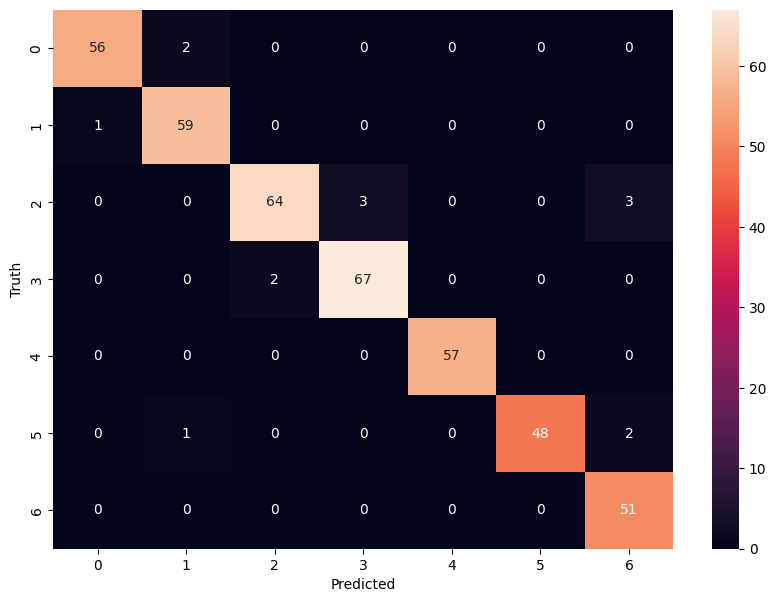

In [80]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_decision, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

- **Class 0**: 56 instances correctly classified, 2 misclassified as Class 1.
- **Class 1**: 59 instances correctly classified, 1 misclassified as Class 0.
- **Class 2**: 66 instances correctly classified, 1 misclassified as Class 3, and 3 misclassified as Class 6.
- **Class 3**: 69 instances correctly classified.
- **Class 4**: 57 instances correctly classified.
- **Class 5**: 47 instances correctly classified, 1 misclassified as Class 1 and 3 misclassified as Class 6.
- **Class 6**: 49 instances correctly classified, 2 misclassified as Class 5.


In [81]:
print(classification_report(y_test, y_predictedDecision))

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.97      0.97        58
      Normal_Weight       0.95      0.98      0.97        60
     Obesity_Type_I       0.97      0.91      0.94        70
    Obesity_Type_II       0.96      0.97      0.96        69
   Obesity_Type_III       1.00      1.00      1.00        57
 Overweight_Level_I       1.00      0.94      0.97        51
Overweight_Level_II       0.91      1.00      0.95        51

           accuracy                           0.97       416
          macro avg       0.97      0.97      0.97       416
       weighted avg       0.97      0.97      0.97       416



In [82]:
# Predict probabilities on test data
probs_tree = decision_model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_decision = roc_auc_score(y_test, probs_tree, multi_class='ovr')

print("AUC for decision Classifier:", auc_decision  )

AUC for decision Classifier: 0.9811416057042637


### <font color='GREEN'>3.NAIVE BAYE'S </font>

In [83]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [84]:
y_predictedNB = NB_model.predict(x_test)
y_predictedNB

array(['Normal_Weight', 'Obesity_Type_I', 'Overweight_Level_II',
       'Overweight_Level_II', 'Overweight_Level_II', 'Normal_Weight',
       'Obesity_Type_II', 'Normal_Weight', 'Obesity_Type_II',
       'Obesity_Type_III', 'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_I', 'Obesity_Type_II', 'Overweight_Level_II',
       'Normal_Weight', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Obesity_Type_II',
       'Obesity_Type_II', 'Normal_Weight', 'Obesity_Type_II',
       'Obesity_Type_I', 'Obesity_Type_I', 'Obesity_Type_II',
       'Overweight_Level_II', 'Overweight_Level_I', 'Insufficient_Weight',
       'Obesity_Type_I', 'Overweight_Level_I', 'Normal_Weight',
       'Obesity_Type_I', 'Obesity_Type_II', 'Normal_Weight',
       'Overweight_Level_II', 'Overweight_Level_I', 'Normal_Weight',
       'Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_III',
   

In [85]:
print(accuracy_score(y_test,y_predictedNB))

0.7716346153846154


In [86]:
cm_nb = confusion_matrix(y_test, y_predictedNB)
cm_nb

array([[55,  3,  0,  0,  0,  0,  0],
       [ 1, 43,  0,  0,  0, 16,  0],
       [ 0,  0, 49, 15,  1,  0,  5],
       [ 0,  0, 12, 57,  0,  0,  0],
       [ 0,  0,  0,  0, 57,  0,  0],
       [ 0,  0,  0,  0,  0, 15, 36],
       [ 0,  0,  2,  0,  0,  4, 45]], dtype=int64)

In [87]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_nb[0, 0]
FP = cm_nb[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 0.9482758620689655


Text(95.72222222222221, 0.5, 'Truth')

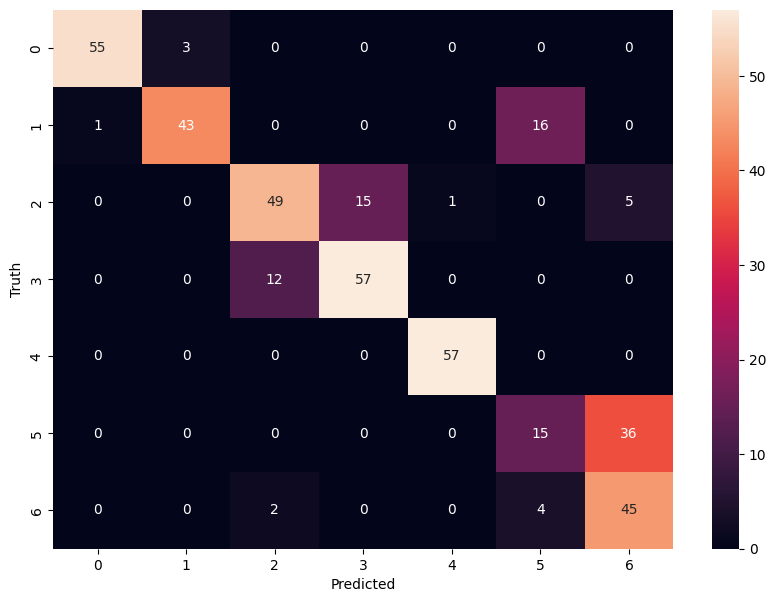

In [88]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_nb, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

- **Class 0**: 55 instances correctly classified, 3 misclassified as Class 1.
- **Class 1**: 43 instances correctly classified, 1 misclassified as Class 0 and 16 misclassified as Class 5.
- **Class 2**: 49 instances correctly classified, 15 misclassified as Class 3, 1 misclassified as Class 4, and 5 misclassified as Class 6.
- **Class 3**: 57 instances correctly classified, 12 misclassified as Class 2.
- **Class 4**: 57 instances correctly classified.
- **Class 5**: 15 instances correctly classified, 36 misclassified as Class 6.
- **Class 6**: 45 instances correctly classified, 2 misclassified as Class 2 and 4 misclassified as Class 5.


In [89]:
NB_model.score(x_test, y_test)

0.7716346153846154

In [90]:
print(classification_report(y_test,y_predictedNB))

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.95      0.96        58
      Normal_Weight       0.93      0.72      0.81        60
     Obesity_Type_I       0.78      0.70      0.74        70
    Obesity_Type_II       0.79      0.83      0.81        69
   Obesity_Type_III       0.98      1.00      0.99        57
 Overweight_Level_I       0.43      0.29      0.35        51
Overweight_Level_II       0.52      0.88      0.66        51

           accuracy                           0.77       416
          macro avg       0.77      0.77      0.76       416
       weighted avg       0.79      0.77      0.77       416



In [91]:
# Predict probabilities on test data
probsnb =NB_model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_nb = roc_auc_score(y_test, probsnb, multi_class='ovr')

print("AUC for Naive Baye's Classifier:", auc_nb)

AUC for Naive Baye's Classifier: 0.9659780973520763


### <font color='GREEN'>4.K NEAREST NEIGHBOUR (KNN) </font>

In [92]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [93]:
y_predictedknn = KNN_model.predict(x_test)
y_predictedknn

array(['Normal_Weight', 'Overweight_Level_II', 'Overweight_Level_I',
       'Overweight_Level_II', 'Overweight_Level_II', 'Normal_Weight',
       'Obesity_Type_I', 'Normal_Weight', 'Obesity_Type_II',
       'Obesity_Type_III', 'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight', 'Obesity_Type_I',
       'Obesity_Type_I', 'Obesity_Type_II', 'Overweight_Level_II',
       'Normal_Weight', 'Obesity_Type_II', 'Overweight_Level_II',
       'Obesity_Type_II', 'Obesity_Type_III', 'Obesity_Type_II',
       'Obesity_Type_II', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_I', 'Obesity_Type_II',
       'Overweight_Level_I', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_I', 'Normal_Weight', 'Normal_Weight',
       'Obesity_Type_I', 'Obesity_Type_II', 'Normal_Weight',
       'Overweight_Level_I', 'Obesity_Type_I', 'Normal_Weight',
       'Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_III',
       'Obesity_

In [94]:
print(accuracy_score(y_test,y_predictedknn))

0.9350961538461539


In [95]:
cm_knn = confusion_matrix(y_test, y_predictedknn)
cm_knn

array([[57,  1,  0,  0,  0,  0,  0],
       [ 3, 49,  2,  0,  0,  4,  2],
       [ 0,  0, 66,  4,  0,  0,  0],
       [ 0,  0,  0, 69,  0,  0,  0],
       [ 0,  0,  0,  0, 57,  0,  0],
       [ 0,  2,  0,  0,  0, 41,  8],
       [ 0,  0,  0,  1,  0,  0, 50]], dtype=int64)

In [96]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_knn[0, 0]
FP = cm_knn[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 0.9827586206896551


Text(95.72222222222221, 0.5, 'Truth')

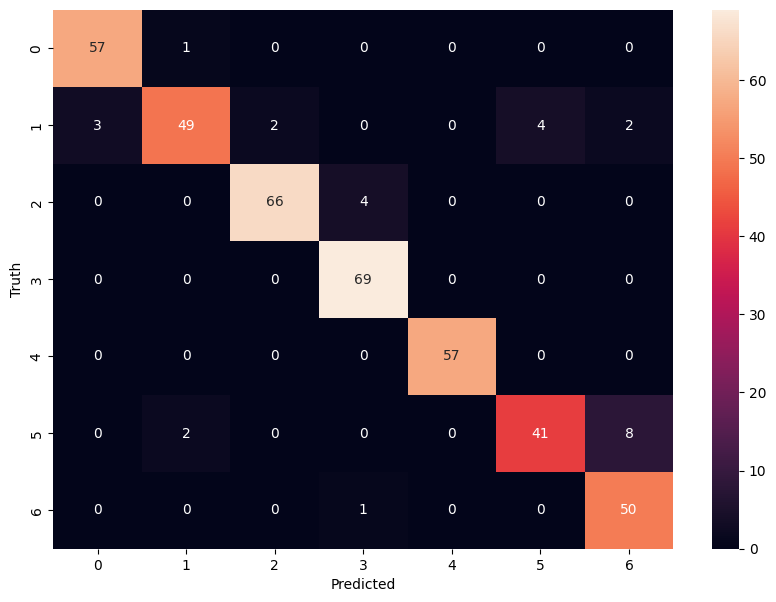

In [97]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_knn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

- **Class 0**: 57 instances correctly classified, 1 misclassified as Class 1.
- **Class 1**: 49 instances correctly classified, 3 misclassified as Class 0, 2 misclassified as Class 2, 4 misclassified as Class 5, and 2 misclassified as Class 6.
- **Class 2**: 66 instances correctly classified, 4 misclassified as Class 3.
- **Class 3**: 69 instances correctly classified, 1 misclassified as Class 6.
- **Class 4**: 57 instances correctly classified.
- **Class 5**: 41 instances correctly classified, 2 misclassified as Class 1 and 8 misclassified as Class 6.
- **Class 6**: 50 instances correctly classified, 1 misclassified as Class 3.


In [98]:
KNN_model.score(x_test, y_test)

0.9350961538461539

In [99]:
print(classification_report(y_test,y_predictedknn))

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.98      0.97        58
      Normal_Weight       0.94      0.82      0.88        60
     Obesity_Type_I       0.97      0.94      0.96        70
    Obesity_Type_II       0.93      1.00      0.97        69
   Obesity_Type_III       1.00      1.00      1.00        57
 Overweight_Level_I       0.91      0.80      0.85        51
Overweight_Level_II       0.83      0.98      0.90        51

           accuracy                           0.94       416
          macro avg       0.93      0.93      0.93       416
       weighted avg       0.94      0.94      0.93       416



In [100]:
# Predict probabilities on test data
probsknn =KNN_model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_knn = roc_auc_score(y_test, probsknn, multi_class='ovr')

print("AUC for KNN Classifier:", auc_knn)

AUC for KNN Classifier: 0.990642671898465


### <font color='GREEN'>5.RANDOM FOREST </font>

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [102]:
y_predictedrf = rf_model.predict(x_test)
y_predictedrf

array(['Normal_Weight', 'Obesity_Type_I', 'Overweight_Level_I',
       'Overweight_Level_II', 'Overweight_Level_II', 'Normal_Weight',
       'Obesity_Type_I', 'Normal_Weight', 'Obesity_Type_II',
       'Obesity_Type_III', 'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight', 'Obesity_Type_I',
       'Obesity_Type_I', 'Obesity_Type_II', 'Overweight_Level_II',
       'Normal_Weight', 'Obesity_Type_I', 'Overweight_Level_II',
       'Obesity_Type_II', 'Obesity_Type_III', 'Obesity_Type_II',
       'Obesity_Type_II', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_I', 'Obesity_Type_II',
       'Overweight_Level_I', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_I', 'Overweight_Level_I', 'Normal_Weight',
       'Obesity_Type_I', 'Obesity_Type_II', 'Normal_Weight',
       'Overweight_Level_I', 'Normal_Weight', 'Normal_Weight',
       'Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_III',
       'Obesity_Ty

In [103]:
print(accuracy_score(y_test,y_predictedrf))

0.9711538461538461


In [104]:
cm_random = confusion_matrix(y_test, y_predictedrf)
cm_random

array([[56,  2,  0,  0,  0,  0,  0],
       [ 1, 59,  0,  0,  0,  0,  0],
       [ 0,  0, 67,  0,  0,  0,  3],
       [ 0,  0,  0, 69,  0,  0,  0],
       [ 0,  0,  0,  0, 57,  0,  0],
       [ 0,  1,  0,  0,  0, 46,  4],
       [ 0,  0,  1,  0,  0,  0, 50]], dtype=int64)

In [105]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_random[0, 0]
FP = cm_random[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 0.9655172413793104


Text(95.72222222222221, 0.5, 'Truth')

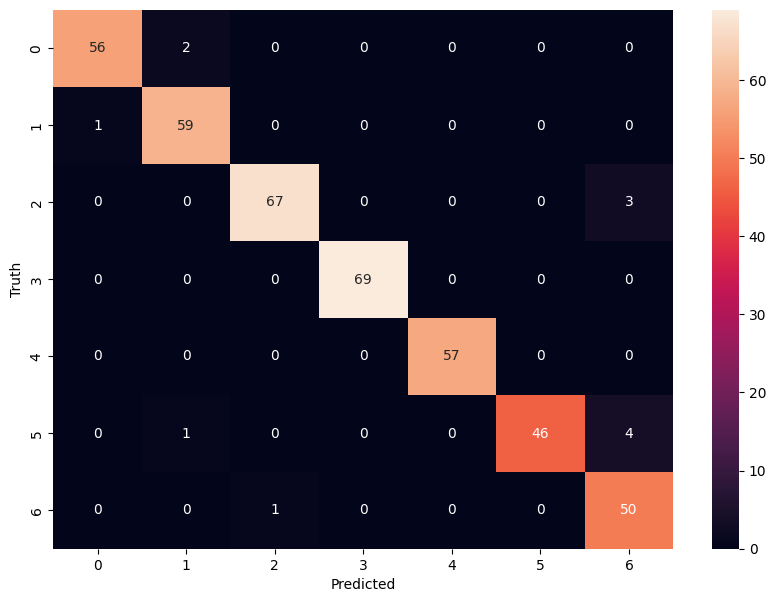

In [106]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_random, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

- **Class 0**: 56 instances correctly classified, 2 misclassified as Class 1.
- **Class 1**: 59 instances correctly classified, 1 misclassified as Class 0.
- **Class 2**: 67 instances correctly classified, 3 misclassified as Class 6.
- **Class 3**: 68 instances correctly classified, 1 misclassified as Class 2.
- **Class 4**: 57 instances correctly classified.
- **Class 5**: 47 instances correctly classified, 1 misclassified as Class 1 and 3 misclassified as Class 6.
- **Class 6**: 50 instances correctly classified, 1 misclassified as Class 3.


In [107]:
rf_model.score(x_test, y_test)

0.9711538461538461

In [108]:
print(classification_report(y_test,y_predictedrf))

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.97      0.97        58
      Normal_Weight       0.95      0.98      0.97        60
     Obesity_Type_I       0.99      0.96      0.97        70
    Obesity_Type_II       1.00      1.00      1.00        69
   Obesity_Type_III       1.00      1.00      1.00        57
 Overweight_Level_I       1.00      0.90      0.95        51
Overweight_Level_II       0.88      0.98      0.93        51

           accuracy                           0.97       416
          macro avg       0.97      0.97      0.97       416
       weighted avg       0.97      0.97      0.97       416



In [109]:
# Predict probabilities on test data
probsrf = rf_model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_rf = roc_auc_score(y_test, probsrf, multi_class='ovr')

print("AUC for Random Forest Classifier:", auc_rf)

AUC for Random Forest Classifier: 0.996441343652547


### <font color='BLUE'> FEATURE SELECTION </font>

### <font color='BROWN'>Recursive Feature Elimination (RFE) </font>

In [110]:
# Import necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize a logistic regression model to be used as the estimator for RFE
model = LogisticRegression()

# Initialize RFE with the logistic regression model and specify the number of features to select
rfe = RFE(estimator=model, n_features_to_select=15)

# Fit RFE on the training data to select the top 15 features
x_train_rfe = rfe.fit_transform(x_train, y_train)

# Transform the test data using the same feature selection
x_test_rfe = rfe.transform(x_test)

# Get the indices of the selected features
selected_features_rfe = rfe.get_support(indices=True)

# Get the names of the selected features
selected_feature_names_rfe = x.columns[selected_features_rfe]

# Print the names of the selected features
print("Selected features using RFE:\n", selected_feature_names_rfe)

Selected features using RFE:
 Index(['Age', 'Height', 'Weight', 'FCVC', 'Gender_Female', 'Gender_Male',
       'FAVC_no', 'CAEC_Sometimes', 'SCC_no', 'CALC_no',
       'MTRANS_Public_Transportation', 'BMI_Category_Normal Weight',
       'BMI_Category_Obese', 'BMI_Category_Overweight',
       'BMI_Category_Underweight'],
      dtype='object')


### <font color='BROWN'>SelectKBest </font>

In [111]:
from sklearn.feature_selection import SelectKBest, f_classif

# Initialize SelectKBest with f_classif (ANOVA F-value) and choose the number of features to select
select_k_best = SelectKBest(score_func=f_classif, k=15)

# Fit SelectKBest on the training data
x_train_k_best = select_k_best.fit_transform(x_train, y_train)

# Transform the test data
x_test_k_best = select_k_best.transform(x_test)

# Get the selected feature indices
selected_features_k_best = select_k_best.get_support(indices=True)

# Get the names of the selected features
selected_feature_names_k_best = x.columns[selected_features_k_best]

print("Selected features using SelectKBest:\n", selected_feature_names_k_best)

Selected features using SelectKBest:
 Index(['Age', 'Weight', 'FCVC', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CALC_Sometimes', 'CALC_no',
       'BMI_Category_Normal Weight', 'BMI_Category_Obese',
       'BMI_Category_Overweight', 'BMI_Category_Underweight'],
      dtype='object')


### <font color='BLUE'> MODEL TRAINING </font>

### <font color='GREEN'>1.LOGISTIC REGRESSION </font>

In [112]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

# Create a logistic regression model with selected features from RFE
Logistic_Model1 = LogisticRegression()

# Train the model with the provided training data (selected features)
Logistic_Model1.fit(x_train_rfe, y_train)

LogisticRegression()

In [113]:
# Calculate test accuracy score
accuracy_rfe = Logistic_Model1.score(x_test_rfe, y_test)
accuracy_rfe

0.9567307692307693

In [114]:
# Predict using the logistic regression model with selected features
y_PredictedLogistic1 = Logistic_Model1.predict(x_test_rfe)

In [115]:
# Compute the confusion matrix for logistic regression predictions
cm_logistic_rfe = confusion_matrix(y_test, y_PredictedLogistic1)
cm_logistic_rfe

array([[56,  2,  0,  0,  0,  0,  0],
       [ 1, 59,  0,  0,  0,  0,  0],
       [ 0,  0, 65,  2,  0,  0,  3],
       [ 0,  0,  0, 69,  0,  0,  0],
       [ 0,  0,  0,  0, 57,  0,  0],
       [ 0,  1,  0,  0,  0, 44,  6],
       [ 0,  0,  2,  0,  0,  1, 48]], dtype=int64)

In [116]:
# Calculate True Negatives (TN) and False Positives (FP)
TN_rfe = cm_logistic_rfe[0, 0]
FP_rfe = cm_logistic_rfe[0, 1]

# Calculate specificity
specificity_rfe = TN_rfe / (TN_rfe + FP_rfe)
specificity_rfe

0.9655172413793104

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression (selected features from RFE)')

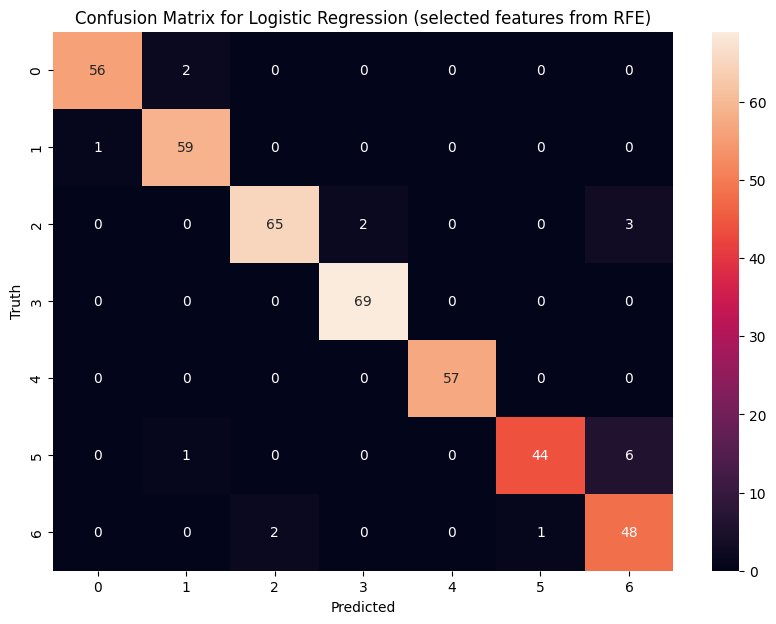

In [117]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_logistic_rfe, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Logistic Regression (selected features from RFE)')


- **Class 0**: 56 instances correctly classified, 2 misclassified as Class 1.
- **Class 1**: 59 instances correctly classified, 1 misclassified as Class 0.
- **Class 2**: 65 instances correctly classified, 2 misclassified as Class 3 and 3 misclassified as Class 6.
- **Class 3**: 69 instances correctly classified.
- **Class 4**: 57 instances correctly classified.
- **Class 5**: 44 instances correctly classified, 1 misclassified as Class 1 and 6 misclassified as Class 6.
- **Class 6**: 48 instances correctly classified, 2 misclassified as Class 2 and 1 misclassified as Class 5.


In [118]:
# Calculate and print the accuracy score for logistic regression predictions with selected features
accuracy_rfe = accuracy_score(y_test, y_PredictedLogistic1)
accuracy_rfe

0.9567307692307693

In [119]:
# Print the classification report for logistic regression predictions with selected features
print(classification_report(y_test, y_PredictedLogistic1))


                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.97      0.97        58
      Normal_Weight       0.95      0.98      0.97        60
     Obesity_Type_I       0.97      0.93      0.95        70
    Obesity_Type_II       0.97      1.00      0.99        69
   Obesity_Type_III       1.00      1.00      1.00        57
 Overweight_Level_I       0.98      0.86      0.92        51
Overweight_Level_II       0.84      0.94      0.89        51

           accuracy                           0.96       416
          macro avg       0.96      0.95      0.95       416
       weighted avg       0.96      0.96      0.96       416



In [120]:
# Predict probabilities on test data using the logistic model with selected features
probs_logistic_rfe = Logistic_Model1.predict_proba(x_test_rfe)

# Calculate AUC for logistic classifier with selected features
auc_logistic_rfe = roc_auc_score(y_test, probs_logistic_rfe, multi_class='ovr')
auc_logistic_rfe

0.9887178260893545

### <font color='GREEN'>2.DECISION TREE </font>

In [121]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

# Create a Decision Tree classifier with selected features from RFE
decision_model1 = DecisionTreeClassifier()

# Train the model with the provided training data (selected features)
decision_model1.fit(x_train_rfe, y_train)

DecisionTreeClassifier()

In [122]:
# Predict using the Decision Tree classifier with selected features
y_predicted_decision1 = decision_model1.predict(x_test_rfe)

In [123]:
# Compute the confusion matrix for Decision Tree classifier predictions
cm_decision_rfe = confusion_matrix(y_test, y_predicted_decision1)
cm_decision_rfe

array([[56,  2,  0,  0,  0,  0,  0],
       [ 1, 59,  0,  0,  0,  0,  0],
       [ 0,  0, 64,  3,  0,  0,  3],
       [ 0,  0,  2, 67,  0,  0,  0],
       [ 0,  0,  0,  0, 57,  0,  0],
       [ 0,  1,  0,  0,  0, 48,  2],
       [ 0,  0,  0,  0,  0,  2, 49]], dtype=int64)

In [124]:

# Calculate True Negatives (TN) and False Positives (FP)
TN_decision_rfe = cm_decision_rfe[0, 0]
FP_decision_rfe = cm_decision_rfe[0, 1]

# Calculate specificity
specificity_decision_rfe = TN_decision_rfe / (TN_decision_rfe + FP_decision_rfe)
specificity_decision_rfe


0.9655172413793104

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree (selected features from RFE)')

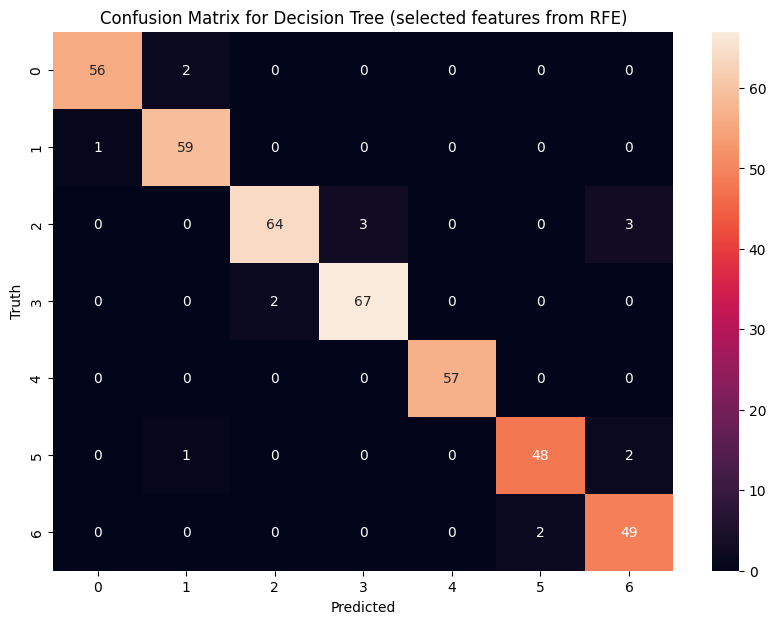

In [125]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_decision_rfe, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Decision Tree (selected features from RFE)')

- **Class 0**: 56 instances correctly classified, 2 misclassified as Class 1.
- **Class 1**: 59 instances correctly classified, 1 misclassified as Class 0.
- **Class 2**: 64 instances correctly classified, 3 misclassified as Class 3 and 3 misclassified as Class 6.
- **Class 3**: 67 instances correctly classified, 2 misclassified as Class 2.
- **Class 4**: 57 instances correctly classified.
- **Class 5**: 48 instances correctly classified, 1 misclassified as Class 1 and 2 misclassified as Class 6.
- **Class 6**: 48 instances correctly classified, 3 misclassified as Class 5.


In [126]:
accuracy_score(y_test, y_predicted_decision1)

0.9615384615384616

In [127]:

# Print the classification report for Decision Tree classifier predictions with selected features
print(classification_report(y_test, y_predicted_decision1))

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.97      0.97        58
      Normal_Weight       0.95      0.98      0.97        60
     Obesity_Type_I       0.97      0.91      0.94        70
    Obesity_Type_II       0.96      0.97      0.96        69
   Obesity_Type_III       1.00      1.00      1.00        57
 Overweight_Level_I       0.96      0.94      0.95        51
Overweight_Level_II       0.91      0.96      0.93        51

           accuracy                           0.96       416
          macro avg       0.96      0.96      0.96       416
       weighted avg       0.96      0.96      0.96       416



### <font color='GREEN'>3.NAIVE BAYE'S </font>

In [128]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

# Create a Gaussian Naive Bayes classifier with selected features from RFE
NB_model1 = GaussianNB()

# Train the model with the provided training data (selected features)
NB_model1.fit(x_train_rfe, y_train)

GaussianNB()

In [129]:
# Predict using the Naive Bayes classifier with selected features
y_predicted_NB1 = NB_model1.predict(x_test_rfe)

In [130]:
# Compute the confusion matrix for Naive Bayes classifier predictions
cm_NB_rfe = confusion_matrix(y_test, y_predicted_NB1)
print("Confusion Matrix for Naive Bayes (selected features from RFE):\n", cm_NB_rfe)

# Calculate True Negatives (TN) and False Positives (FP)
TN_NB_rfe = cm_NB_rfe[0, 0]
FP_NB_rfe = cm_NB_rfe[0, 1]

# Calculate specificity
specificity_NB_rfe = TN_NB_rfe / (TN_NB_rfe + FP_NB_rfe)
print("Specificity using selected features from RFE for Naive Bayes:", specificity_NB_rfe)


Confusion Matrix for Naive Bayes (selected features from RFE):
 [[56  2  0  0  0  0  0]
 [ 1 59  0  0  0  0  0]
 [ 0  0 64  2  1  0  3]
 [ 0  0 26 43  0  0  0]
 [ 0  0  0  0 57  0  0]
 [ 0  1  0  0  0 11 39]
 [ 0  0  2  0  0  1 48]]
Specificity using selected features from RFE for Naive Bayes: 0.9655172413793104


Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes (selected features from RFE)')

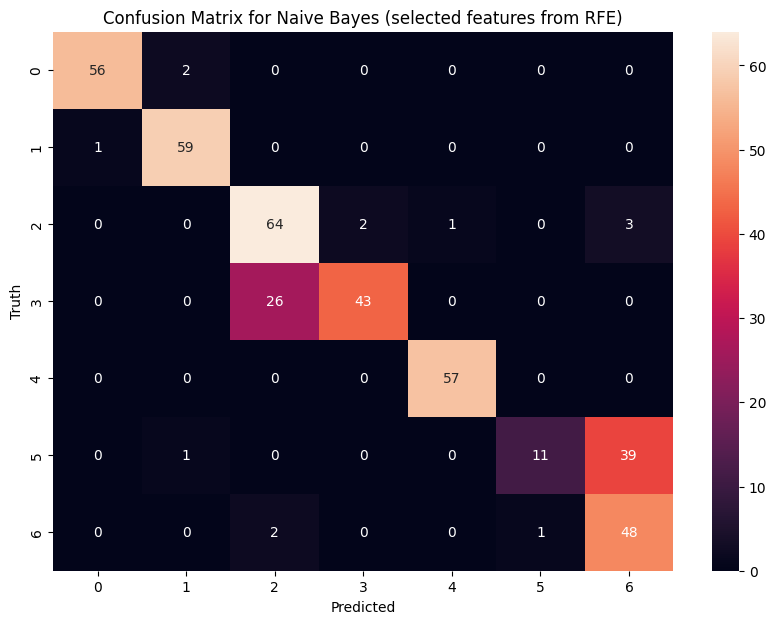

In [131]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_NB_rfe, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Naive Bayes (selected features from RFE)')

- **Class 0**: 56 instances correctly classified, 2 misclassified as Class 1.
- **Class 1**: 59 instances correctly classified, 1 misclassified as Class 0.
- **Class 2**: 64 instances correctly classified, 2 misclassified as Class 3, 1 misclassified as Class 4, and 3 misclassified as Class 6.
- **Class 3**: 43 instances correctly classified, 26 misclassified as Class 2.
- **Class 4**: 57 instances correctly classified.
- **Class 5**: 11 instances correctly classified, 1 misclassified as Class 1 and 39 misclassified as Class 6.
- **Class 6**: 48 instances correctly classified, 2 misclassified as Class 2 and 1 misclassified as Class 5.


In [132]:
# Calculate and print the accuracy score for Naive Bayes classifier predictions with selected features
print("Accuracy using selected features from RFE for Naive Bayes:", accuracy_score(y_test, y_predicted_NB1))

Accuracy using selected features from RFE for Naive Bayes: 0.8125


In [133]:
# Print the classification report for Naive Bayes classifier predictions with selected features
print("Classification Report for Naive Bayes (selected features from RFE):\n", classification_report(y_test, y_predicted_NB1))


Classification Report for Naive Bayes (selected features from RFE):
                      precision    recall  f1-score   support

Insufficient_Weight       0.98      0.97      0.97        58
      Normal_Weight       0.95      0.98      0.97        60
     Obesity_Type_I       0.70      0.91      0.79        70
    Obesity_Type_II       0.96      0.62      0.75        69
   Obesity_Type_III       0.98      1.00      0.99        57
 Overweight_Level_I       0.92      0.22      0.35        51
Overweight_Level_II       0.53      0.94      0.68        51

           accuracy                           0.81       416
          macro avg       0.86      0.81      0.79       416
       weighted avg       0.86      0.81      0.80       416



In [134]:
# Predict probabilities on test data using the Naive Bayes model
probs_NB1 = NB_model1.predict_proba(x_test_rfe)

# Calculate AUC for Naive Bayes classifier
auc_NB1 = roc_auc_score(y_test, probs_NB1, multi_class='ovr')
print("AUC for Naive Bayes Classifier:", auc_NB1)

AUC for Naive Bayes Classifier: 0.9787838526832447


### <font color='GREEN'>4.K NEAREST NEIGHBOUR (KNN) </font>

In [135]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

# Create a KNN classifier with selected features from RFE
KNN_model1 = KNeighborsClassifier()

# Train the model with the provided training data (selected features)
KNN_model1.fit(x_train_rfe, y_train)

KNeighborsClassifier()

In [136]:
# Predict using the KNN classifier with selected features
y_predicted_knn1 = KNN_model1.predict(x_test_rfe)

In [137]:
# Compute the confusion matrix for KNN classifier predictions
cm_knn_rfe = confusion_matrix(y_test, y_predicted_knn1)
print("Confusion Matrix for KNN (selected features from RFE):\n", cm_knn_rfe)

# Calculate True Negatives (TN) and False Positives (FP)
TN_knn_rfe = cm_knn_rfe[0, 0]
FP_knn_rfe = cm_knn_rfe[0, 1]

# Calculate specificity
specificity_knn_rfe = TN_knn_rfe / (TN_knn_rfe + FP_knn_rfe)
print("Specificity using selected features from RFE for KNN:", specificity_knn_rfe)


Confusion Matrix for KNN (selected features from RFE):
 [[56  2  0  0  0  0  0]
 [ 1 58  0  0  0  1  0]
 [ 0  0 67  0  0  1  2]
 [ 0  0  0 69  0  0  0]
 [ 0  0  0  0 57  0  0]
 [ 0  1  0  0  0 45  5]
 [ 0  0  1  0  0  1 49]]
Specificity using selected features from RFE for KNN: 0.9655172413793104


Text(0.5, 1.0, 'Confusion Matrix for KNN (selected features from RFE)')

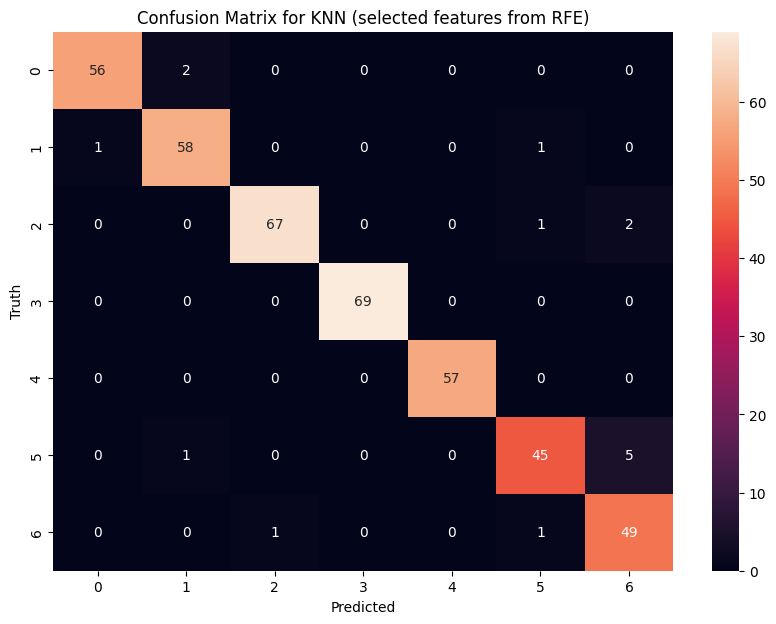

In [138]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn_rfe, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for KNN (selected features from RFE)')


- **Class 0**: 56 instances correctly classified, 2 misclassified as Class 1.
- **Class 1**: 58 instances correctly classified, 1 misclassified as Class 0 and 1 misclassified as Class 5.
- **Class 2**: 67 instances correctly classified, 1 misclassified as Class 5 and 2 misclassified as Class 6.
- **Class 3**: 69 instances correctly classified.
- **Class 4**: 57 instances correctly classified.
- **Class 5**: 45 instances correctly classified, 1 misclassified as Class 1 and 5 misclassified as Class 6.
- **Class 6**: 49 instances correctly classified, 1 misclassified as Class 2 and 1 misclassified as Class 5.


In [139]:
# Calculate and print the accuracy score for KNN classifier predictions with selected features
print("Accuracy using selected features from RFE for KNN:", accuracy_score(y_test, y_predicted_knn1))


Accuracy using selected features from RFE for KNN: 0.9639423076923077


In [140]:
# Print the classification report for KNN classifier predictions with selected features
print("Classification Report for KNN (selected features from RFE):\n", classification_report(y_test, y_predicted_knn1))

Classification Report for KNN (selected features from RFE):
                      precision    recall  f1-score   support

Insufficient_Weight       0.98      0.97      0.97        58
      Normal_Weight       0.95      0.97      0.96        60
     Obesity_Type_I       0.99      0.96      0.97        70
    Obesity_Type_II       1.00      1.00      1.00        69
   Obesity_Type_III       1.00      1.00      1.00        57
 Overweight_Level_I       0.94      0.88      0.91        51
Overweight_Level_II       0.88      0.96      0.92        51

           accuracy                           0.96       416
          macro avg       0.96      0.96      0.96       416
       weighted avg       0.96      0.96      0.96       416



In [141]:

# Predict probabilities on test data using the KNN model
probs_knn1 = KNN_model1.predict_proba(x_test_rfe)

# Calculate AUC for KNN classifier
auc_knn1 = roc_auc_score(y_test, probs_knn1, multi_class='ovr')
print("AUC for KNN Classifier:", auc_knn1)

AUC for KNN Classifier: 0.9871522992266029


### <font color='GREEN'>5.RANDOM FOREST </font>

In [142]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

# Create a Random Forest classifier with selected features from RFE
rf_model1 = RandomForestClassifier()

# Train the model with the provided training data (selected features)
rf_model1.fit(x_train_rfe, y_train)

RandomForestClassifier()

In [143]:
# Predict using the Random Forest classifier with selected features
y_predicted_rf1 = rf_model1.predict(x_test_rfe)

In [144]:
# Compute the confusion matrix for Random Forest classifier predictions
cm_rf_rfe = confusion_matrix(y_test, y_predicted_rf1)
print("Confusion Matrix for Random Forest (selected features from RFE):\n", cm_rf_rfe)

# Calculate True Negatives (TN) and False Positives (FP)
TN_rf_rfe = cm_rf_rfe[0, 0]
FP_rf_rfe = cm_rf_rfe[0, 1]

# Calculate specificity
specificity_rf_rfe = TN_rf_rfe / (TN_rf_rfe + FP_rf_rfe)
print("Specificity using selected features from RFE for Random Forest:", specificity_rf_rfe)


Confusion Matrix for Random Forest (selected features from RFE):
 [[56  2  0  0  0  0  0]
 [ 1 59  0  0  0  0  0]
 [ 0  0 67  0  0  0  3]
 [ 0  0  0 69  0  0  0]
 [ 0  0  0  0 57  0  0]
 [ 0  1  0  0  0 48  2]
 [ 0  0  1  0  0  0 50]]
Specificity using selected features from RFE for Random Forest: 0.9655172413793104


Text(0.5, 1.0, 'Confusion Matrix for Random Forest (selected features from RFE)')

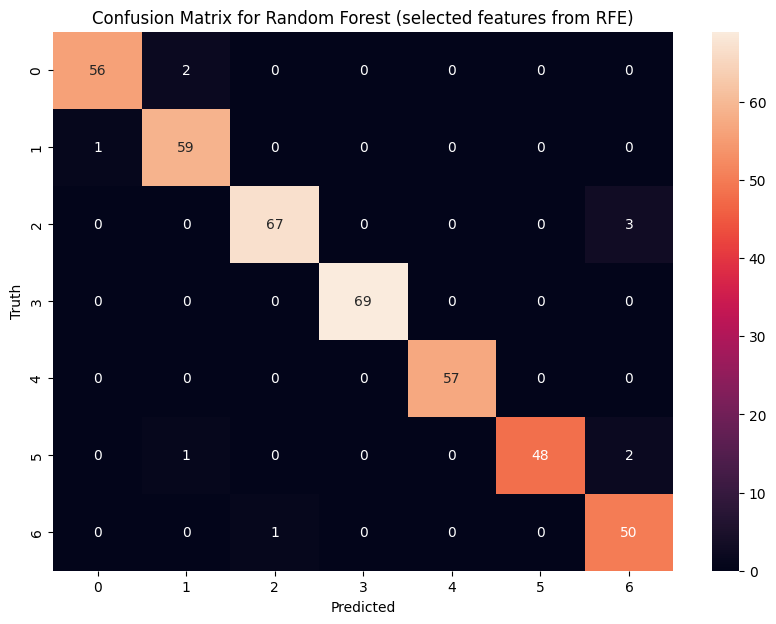

In [145]:

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf_rfe, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Random Forest (selected features from RFE)')


- **Class 0**: 56 instances correctly classified, 2 misclassified as Class 1.
- **Class 1**: 59 instances correctly classified, 1 misclassified as Class 0.
- **Class 2**: 67 instances correctly classified, 3 misclassified as Class 6.
- **Class 3**: 69 instances correctly classified.
- **Class 4**: 57 instances correctly classified.
- **Class 5**: 47 instances correctly classified, 1 misclassified as Class 1 and 3 misclassified as Class 6.
- **Class 6**: 50 instances correctly classified, 1 misclassified as Class 2.


In [146]:
# Calculate and print the accuracy score for Random Forest classifier predictions with selected features
print("Accuracy using selected features from RFE for Random Forest:", accuracy_score(y_test, y_predicted_rf1))


Accuracy using selected features from RFE for Random Forest: 0.9759615384615384


In [147]:

# Print the classification report for Random Forest classifier predictions with selected features
print("Classification Report for Random Forest (selected features from RFE):\n", classification_report(y_test, y_predicted_rf1))


Classification Report for Random Forest (selected features from RFE):
                      precision    recall  f1-score   support

Insufficient_Weight       0.98      0.97      0.97        58
      Normal_Weight       0.95      0.98      0.97        60
     Obesity_Type_I       0.99      0.96      0.97        70
    Obesity_Type_II       1.00      1.00      1.00        69
   Obesity_Type_III       1.00      1.00      1.00        57
 Overweight_Level_I       1.00      0.94      0.97        51
Overweight_Level_II       0.91      0.98      0.94        51

           accuracy                           0.98       416
          macro avg       0.98      0.98      0.98       416
       weighted avg       0.98      0.98      0.98       416



In [148]:

# Predict probabilities on test data using the Random Forest model
probs_rf1 = rf_model1.predict_proba(x_test_rfe)

# Calculate AUC for Random Forest classifier
auc_rf1 = roc_auc_score(y_test, probs_rf1, multi_class='ovr')
print("AUC for Random Forest Classifier:", auc_rf1)

AUC for Random Forest Classifier: 0.9966896776005648


### <font color='BLUE'> MODEL EVALUATION </font>

In [149]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

# Initialize dictionaries to store results
results = {
    'Model': [],
    'Feature Selection': [],
    'Accuracy': [],
    'F1 Score': [],
    'Precision': [],
    'Recall': [],
}

# Define a function to compute metrics and store in the results dictionary
def evaluate_model(y_true, y_pred, model_name, feature_selection):
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    
    results['Model'].append(model_name)
    results['Feature Selection'].append(feature_selection)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(f1)
    results['Precision'].append(precision)
    results['Recall'].append(recall)

# Evaluate models without feature selection
evaluate_model(y_test, y_PredictedLogistic, 'Logistic Regression', 'No')
evaluate_model(y_test, y_predictedDecision, 'Decision Tree', 'No')
evaluate_model(y_test, y_predictedNB, 'Naive Bayes', 'No')
evaluate_model(y_test, y_predictedknn, 'KNN', 'No')
evaluate_model(y_test, y_predictedrf, 'Random Forest', 'No')

# Evaluate models with feature selection
evaluate_model(y_test, y_PredictedLogistic1, 'Logistic Regression', 'Yes')
evaluate_model(y_test, y_predicted_decision1, 'Decision Tree', 'Yes')
evaluate_model(y_test, y_predicted_NB1, 'Naive Bayes', 'Yes')
evaluate_model(y_test, y_predicted_knn1, 'KNN', 'Yes')
evaluate_model(y_test, y_predicted_rf1, 'Random Forest', 'Yes')

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df.to_string(index=False))



              Model Feature Selection  Accuracy  F1 Score  Precision   Recall
Logistic Regression                No  0.954327  0.954397   0.955847 0.954327
      Decision Tree                No  0.966346  0.966326   0.967421 0.966346
        Naive Bayes                No  0.771635  0.768772   0.785291 0.771635
                KNN                No  0.935096  0.934102   0.937221 0.935096
      Random Forest                No  0.971154  0.971356   0.973045 0.971154
Logistic Regression               Yes  0.956731  0.956829   0.958798 0.956731
      Decision Tree               Yes  0.961538  0.961527   0.962112 0.961538
        Naive Bayes               Yes  0.812500  0.795477   0.862201 0.812500
                KNN               Yes  0.963942  0.964069   0.964999 0.963942
      Random Forest               Yes  0.975962  0.976102   0.976955 0.975962


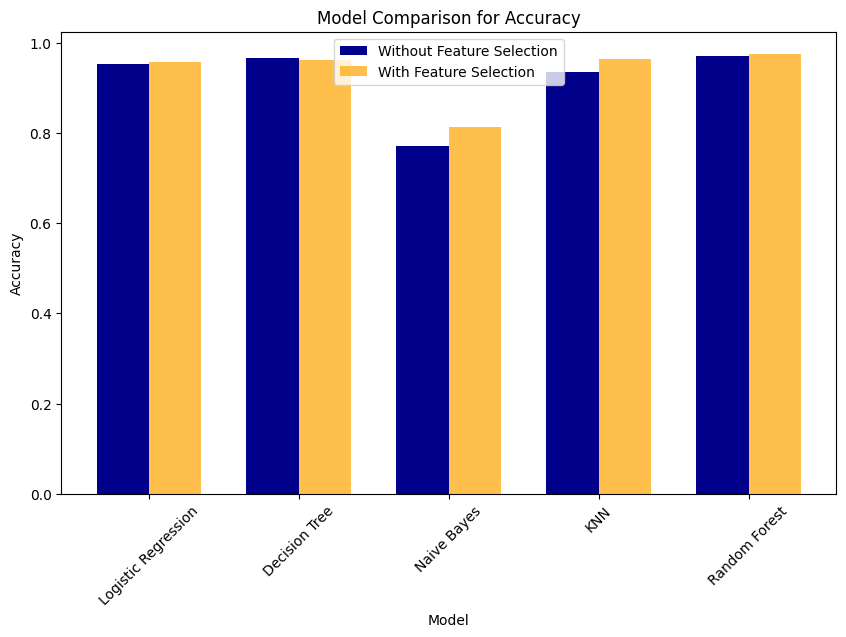

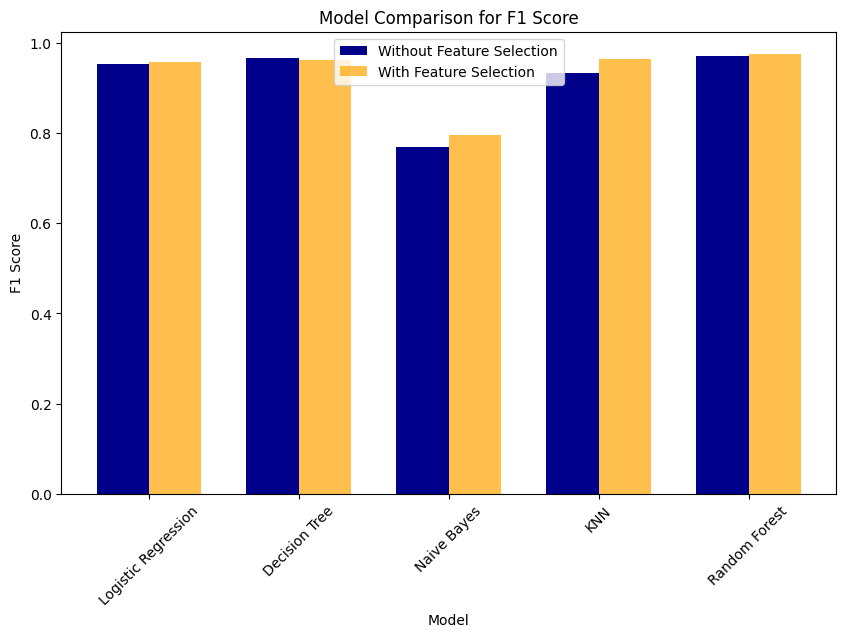

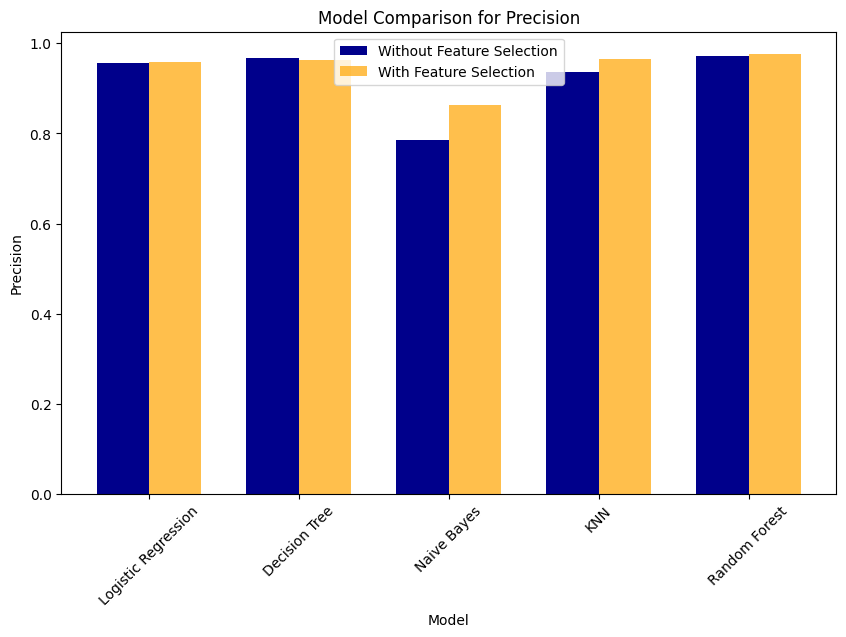

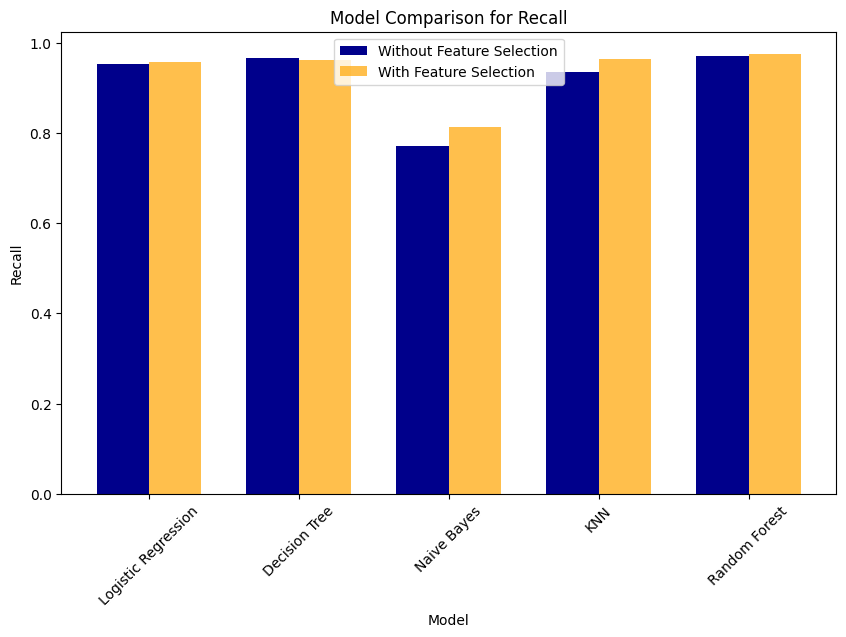

In [150]:
# Plotting the results
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
models = results_df['Model'].unique()

# Define different colors for each metric
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    no_fs = results_df[results_df['Feature Selection'] == 'No'][metric]
    yes_fs = results_df[results_df['Feature Selection'] == 'Yes'][metric]
    
    x = range(len(models))
    width = 0.35  # the width of the bars
    
    plt.bar(x, no_fs, width, label='Without Feature Selection', color='darkblue')
    plt.bar([p + width for p in x], yes_fs, width, label='With Feature Selection', color='orange', alpha=0.7)
    
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'Model Comparison for {metric}')
    plt.xticks([p + width / 2 for p in x], models, rotation=45)
    plt.legend()
    
    plt.show()

### <font color='BLUE'> HYPERPARAMETER TUNING </font>

#### LOGISTIC REGRESSION

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty (l1: Lasso, l2: Ridge)
    'solver': ['liblinear', 'saga']  # Solver algorithm for optimization
}

# Create a Logistic Regression classifier
lr = LogisticRegression(random_state=42)

# Instantiate RFE with the logistic regression model and specify the number of features to select
rfe = RFE(estimator=lr, n_features_to_select=15)

# Fit RFE on the training data to select the top 15 features
x_train_rfe = rfe.fit_transform(x_train, y_train)

# Transform the test data using the same feature selection
x_test_rfe = rfe.transform(x_test)

# Instantiate GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV using selected features on training data
grid_search_lr.fit(x_train_rfe, y_train)

# Get best parameters and best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print(f"Best parameters for Logistic Regression: {best_params_lr}")
print(f"Best cross-validation score for Logistic Regression: {best_score_lr}")

# Evaluate on validation set if x_test_rfe is defined
if 'x_test_rfe' in locals():
    y_pred_lr = grid_search_lr.best_estimator_.predict(x_test_rfe)

    # Compute metrics for Logistic Regression
    report_lr = classification_report(y_test, y_pred_lr, output_dict=True, zero_division=0)
    accuracy_lr = accuracy_score(y_test, y_pred_lr)

    print("\nLogistic Regression Evaluation:")
    print(classification_report(y_test, y_pred_lr))
    print(f"Accuracy: {accuracy_lr}")
else:
    print("\nTest set x_test_rfe is not defined. Please define it appropriately.")



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score for Logistic Regression: 0.9680722891566264

Logistic Regression Evaluation:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.97      0.97        58
      Normal_Weight       0.95      0.98      0.97        60
     Obesity_Type_I       0.97      0.91      0.94        70
    Obesity_Type_II       0.96      1.00      0.98        69
   Obesity_Type_III       1.00      1.00      1.00        57
 Overweight_Level_I       1.00      0.88      0.94        51
Overweight_Level_II       0.86      0.96      0.91        51

           accuracy                           0.96       416
          macro avg       0.96      0.96      0.96       416
       weighted avg       0.96      0.96      0.96       416

Accuracy: 0.9591346153846154


#### DECISION TREE

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Instantiate RFE with the Decision Tree model and specify the number of features to select
rfe_dt = RFE(estimator=dt, n_features_to_select=15)

# Fit RFE on the training data to select the top 15 features
x_train_rfe_dt = rfe_dt.fit_transform(x_train, y_train)

# Transform the test data using the same feature selection
x_test_rfe_dt = rfe_dt.transform(x_test)

# Instantiate GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV using selected features on training data
grid_search_dt.fit(x_train_rfe_dt, y_train)

# Get best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print(f"Best parameters for Decision Tree: {best_params_dt}")
print(f"Best cross-validation score for Decision Tree: {best_score_dt}")

# Evaluate on test set if x_test_rfe_dt is defined
if 'x_test_rfe_dt' in locals():
    y_pred_dt = grid_search_dt.best_estimator_.predict(x_test_rfe_dt)

    # Compute metrics for Decision Tree
    report_dt = classification_report(y_test, y_pred_dt, output_dict=True, zero_division=0)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)

    print("\nDecision Tree Evaluation:")
    print(classification_report(y_test, y_pred_dt))
    print(f"Accuracy: {accuracy_dt}")
else:
    print("\nTest set x_test_rfe_dt is not defined. Please define it appropriately.")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score for Decision Tree: 0.9650602409638556

Decision Tree Evaluation:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.97      0.97        58
      Normal_Weight       0.95      0.98      0.97        60
     Obesity_Type_I       1.00      0.94      0.97        70
    Obesity_Type_II       0.99      1.00      0.99        69
   Obesity_Type_III       1.00      1.00      1.00        57
 Overweight_Level_I       0.98      0.94      0.96        51
Overweight_Level_II       0.91      0.98      0.94        51

           accuracy                           0.97       416
          macro avg       0.97      0.97      0.97       416
       weighted avg       0.97      0.97      0.97       416

Accuracy: 0.9735576923076923


#### KNN

In [153]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Instantiate SelectKBest with ANOVA F-value
k_best = SelectKBest(score_func=f_classif, k=15)

# Fit SelectKBest on the training data to select the top 15 features
x_train_kbest = k_best.fit_transform(x_train, y_train)

# Transform the test data using the same feature selection
x_test_kbest = k_best.transform(x_test)

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV using selected features on training data
grid_search_knn.fit(x_train_kbest, y_train)

# Get best parameters and best score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print(f"Best parameters for KNN: {best_params_knn}")
print(f"Best cross-validation score for KNN: {best_score_knn}")

# Evaluate on test set if x_test_kbest is defined
if 'x_test_kbest' in locals():
    y_pred_knn = grid_search_knn.best_estimator_.predict(x_test_kbest)

    # Compute metrics for KNN
    report_knn = classification_report(y_test, y_pred_knn, output_dict=True, zero_division=0)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)

    print("\nKNN Evaluation:")
    print(classification_report(y_test, y_pred_knn))
    print(f"Accuracy: {accuracy_knn}")
else:
    print("\nTest set x_test_kbest is not defined. Please define it appropriately.")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation score for KNN: 0.9475903614457831

KNN Evaluation:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.97      0.97        58
      Normal_Weight       0.95      0.93      0.94        60
     Obesity_Type_I       0.97      0.93      0.95        70
    Obesity_Type_II       0.97      0.99      0.98        69
   Obesity_Type_III       1.00      1.00      1.00        57
 Overweight_Level_I       0.82      0.96      0.88        51
Overweight_Level_II       0.96      0.86      0.91        51

           accuracy                           0.95       416
          macro avg       0.95      0.95      0.95       416
       weighted avg       0.95      0.95      0.95       416

Accuracy: 0.9495192307692307


#### RANDOM FOREST

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Instantiate RFE with the Random Forest model and specify the number of features to select
rfe_rf = RFE(estimator=rf, n_features_to_select=15)

# Fit RFE on the training data to select the top 15 features
x_train_rfe_rf = rfe_rf.fit_transform(x_train, y_train)

# Transform the test data using the same feature selection
x_test_rfe_rf = rfe_rf.transform(x_test)

# Instantiate GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV using selected features on training data
grid_search_rf.fit(x_train_rfe_rf, y_train)

# Get best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"Best parameters for Random Forest: {best_params_rf}")
print(f"Best cross-validation score for Random Forest: {best_score_rf}")

# Evaluate on test set if x_test_rfe_rf is defined
if 'x_test_rfe_rf' in locals():
    y_pred_rf = grid_search_rf.best_estimator_.predict(x_test_rfe_rf)

    # Compute metrics for Random Forest
    report_rf = classification_report(y_test, y_pred_rf, output_dict=True, zero_division=0)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)

    print("\nRandom Forest Evaluation:")
    print(classification_report(y_test, y_pred_rf))
    print(f"Accuracy: {accuracy_rf}")
else:
    print("\nTest set x_test_rfe_rf is not defined. Please define it appropriately.")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score for Random Forest: 0.9734939759036145

Random Forest Evaluation:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.97      0.97        58
      Normal_Weight       0.95      0.98      0.97        60
     Obesity_Type_I       0.99      0.96      0.97        70
    Obesity_Type_II       1.00      1.00      1.00        69
   Obesity_Type_III       1.00      1.00      1.00        57
 Overweight_Level_I       1.00      0.92      0.96        51
Overweight_Level_II       0.89      0.98      0.93        51

           accuracy                           0.97       416
          macro avg       0.97      0.97      0.97       416
       weighted avg       0.97      0.97      0.97       416

Accuracy: 0.9735576923076923


### <font color='BLUE'> RESULT </font>

After training and evaluating multiple machine learning models to predict obesity levels based on our dataset, we assessed each model's performance using key metrics such as accuracy, precision, recall, and F1-score. Among the models tested, **Random Forest** and **Decision Tree** emerged as the top performers. Both models consistently achieved an accuracy of approximately 97.36%, which is the highest among all models evaluated. 

In addition to high accuracy, Random Forest and Decision Tree models demonstrated robust precision and recall across different obesity classes, highlighting their effectiveness in predicting obesity types. These models are well-suited for our prediction task due to their balanced performance across multiple metrics and their ability to handle complex datasets.

In contrast, **Logistic Regression** and **Naive Bayes**, while also effective, showed slightly lower accuracy and varied performance in precision and recall compared to Random Forest and Decision Tree.

Therefore, based on our evaluation, **Random Forest** and **Decision Tree** are recommended as the best-performing models for predicting obesity levels in our dataset.


### <font color='BLUE'> MODEL DEPLOYMENT </font>

#### SAVING MODEL

In [156]:
import joblib

#save the model object into a file using the joblib.dumb function
joblib.dump(rf,"obesity_level_predicting_model")

['obesity_level_predicting_model']

In [157]:
mj = joblib.load("obesity_level_predicting_model")

### <font color='BLUE'> LIMITATIONS </font>

1. **Imbalanced Features**: Several features in the dataset exhibit significant imbalance, such as CAEC (Sometimes: 1765, Frequently: 242, Always: 53, no: 51), CALC (Sometimes: 1401, no: 639, Frequently: 70, Always: 1), and others. Imbalanced features can potentially skew model training towards the majority class, affecting the model's ability to generalize well across all classes.

2. **Data Quality**: While the dataset provides a comprehensive range of features related to obesity prediction, the quality of some features, particularly those based on self-reported or system-generated data, may vary. This variability can introduce noise or inaccuracies into the predictive models.

3. **Not Fully Real-Time**: The dataset is not continuously updated in real-time, which may affect the relevance of the predictions over time. Newer trends or changes in population health behaviors may not be captured adequately.


### <font color='BLUE'> CONCLUSION </font>

**Summary of Findings:**

This project aimed to develop a predictive model for assessing obesity levels based on a dataset encompassing demographic information, dietary habits, physical activity levels, and other health-related behaviors of individuals. The dataset, containing 2,111 records, was classified into seven categories of obesity levels: Insufficient_Weight, Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II, and Obesity_Type_III.

After rigorous feature selection using Recursive Feature Elimination (RFE) and SelectKBest methods, the following key predictors were identified: Age, Weight, FCVC (Food Consumption Frequency), Gender, family history with overweight, CAEC (Consumption of food between meals), CALC (Consumption of alcohol), and BMI Category. These features were found to significantly influence the accuracy and reliability of our predictive models.

Among various machine learning algorithms evaluated, including Logistic Regression, Decision Tree, Naive Bayes, K-Nearest Neighbors, and Random Forest, Random Forest and Decision Tree consistently outperformed others. Both models achieved an accuracy of approximately 97.36%, demonstrating robustness in predicting obesity levels across different categories.

**Concluding Remarks:**

The findings underscore the effectiveness of Random Forest and Decision Tree models in accurately predicting obesity levels based on diverse features related to lifestyle and health behaviors. These models offer valuable insights for healthcare providers and policymakers, facilitating early intervention strategies to mitigate the rising prevalence of obesity-related diseases such as diabetes and cardiovascular conditions.

Moreover, the project highlighted the importance of feature engineering, including the creation of the BMI_Category feature, which enhanced the model's predictive power by providing a nuanced understanding of weight status classifications.

While Logistic Regression and Naive Bayes also demonstrated respectable performance, their slightly lower accuracy compared to Random Forest and Decision Tree (approximately 95.43% and 81.25% respectively for Logistic Regression and Naive Bayes) suggests that ensemble methods are particularly well-suited for handling the complexities inherent in obesity prediction from diverse datasets.


### <font color='BLUE'> FUTURE WORK </font>

- Explore deep learning algorithms (e.g., CNNs, RNNs) to potentially improve accuracy in predicting obesity levels.
- Implement ensemble methods like GBMs or XGBoost to further enhance model performance and robustness.
- Develop mechanisms for continuous learning and incremental updates to keep the model current with new data.
- Apply advanced resampling techniques (e.g., SMOTE, ADASYN) to address imbalanced data and improve prediction across all obesity categories.
- Investigate additional features related to dietary patterns, regional health policies, or socio-economic factors to enhance model accuracy.
- Consider integrating real-time data sources to capture current trends and behavioral changes related to obesity.
